# Изучение закономерностей, определяющих успешность игр

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


**Цель исследования**:
1. Изучить количество выпускаемых игр в разные годы.
2. Изучить изменения продаж по различным платформам.
3. Определить лидирующие платформы.
4. Изучить срок жизни платформ, как часто появляются новые и исчезают старые.
5. Найти актуальных лидеров по продажам.
6. Определить влияние отзывов на продажи.
7. Изучить прибыльные жанры.
8. Составить портрет типичного пользователя по регионам.
9. Проверить гипотезы.

**Ход исследования**

О качестве данных ничего не известно. Поэтому перед проведением исследования понадобится обзор данных. 
Необходимо проверить данные на ошибки и пропуски, преобразовать типы данных.

На этапе предобработки найти возможность исправить критичные пропуски и добавить несколько вспомогательных столбцов.
Таким образом, исследование пройдёт в четыре этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Проверка гипотез.

## Оглавление

<a href='#1'> 1. Изучение общей информации </a>
- <a href='#2'> 1.1 Вывод</a>

<a href='#3'> 2. Предобработка данных</a>
- <a href='#4'> 2.1 Изменение типов данных</a>
- <a href='#5'> 2.2 Заполнение и удаление пропусков</a>
    - <a href='#6'> 2.3 Вывод</a>
- <a href='#7'> 2.4 Поиск дубликатов</a>
- <a href='#8'> 2.5 Выводы по разделу</a>

<a href='#9'> 3. Исследовательский анализ данных </a>
- <a href='#10'> 3.1 Количество выпускаемых игр по годам </a>
- <a href='#11'> 3.2 Продажи по платформам </a>
- <a href='#12'> 3.3 Топ платформ по продажам </a>
- <a href='#13'> 3.4 Срок жизни платформы</a>
- <a href='#14'> 3.5 Актуализация данных</a>
- <a href='#15'> 3.6 Актуальные лидеры продаж</a>
- <a href='#16'> 3.7 Исследование падения выручки </a>
    - <a href='#17'> 3.8 Вывод</a>
- <a href='#18'> 3.9 "Ящик с усами" глобальных продаж</a>
- <a href='#19'> 3.10 Влияние отзывов на продажи </a>
    - <a href='#20'> 3.11 Вывод</a>
- <a href='#21'> 3.12 Прибыльные жанры</a>
- <a href='#22'> 3.13 Вывод по разделу</a>

<a href='#23'> 4. Портрет пользователя по регионам </a>
- <a href='#24'> 4.1 Популярные платформы</a>
- <a href='#25'> 4.2 Популярные жанры</a>
- <a href='#26'> 4.3 Влияние рейтинга на продажи</a>
- <a href='#27'> 4.4 Вывод по разделу </a>

<a href='#28'> 5. Проверка гипотез</a>
- <a href='#29'> 5.1 Первая гипотеза</a>
- <a href='#30'> 5.2 Вторая гипотеза</a>

<a href='#31'> 6. Общие выводы</a>

**Импорт библиотек**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

#визуализация 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Изучение общей информации <a id='1'></a>

In [2]:
#импорт датафрейма
df = pd.read_csv('games.csv')

In [3]:
#первые 5 строчек датафрейма
df.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [4]:
#последние 5 строчек
df.tail()

Name Platform  Year_of_Release       Genre  \
16710  Samurai Warriors: Sanada Maru      PS3           2016.0      Action   
16711               LMA Manager 2007     X360           2006.0      Sports   
16712        Haitaka no Psychedelica      PSV           2016.0   Adventure   
16713               Spirits & Spells      GBA           2003.0    Platform   
16714            Winning Post 8 2016      PSV           2016.0  Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
16710      0.00      0.00      0.01          0.0           NaN        NaN   
16711      0.00      0.01      0.00          0.0           NaN        NaN   
16712      0.00      0.00      0.01          0.0           NaN        NaN   
16713      0.01      0.00      0.00          0.0           NaN        NaN   
16714      0.00      0.00      0.01          0.0           NaN        NaN   

      Rating  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN

In [5]:
#общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
#описание значений датафрейма
df.describe()

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

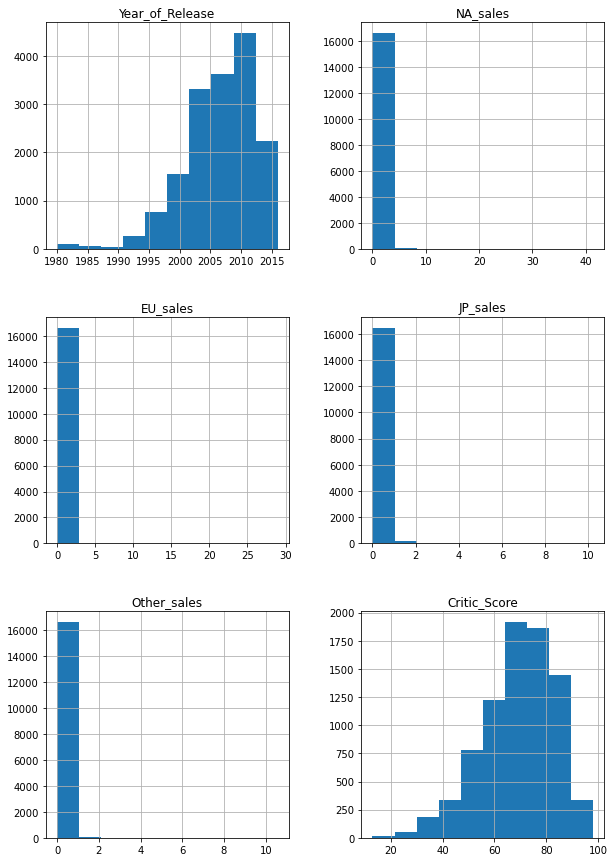

In [7]:
#гистограммы датафрейма
df.hist(figsize=(10, 15));

### Вывод <a id='2'></a>
При изучение общей информации выявлены проблемы для исправления:
- Необходимо привести названия столбцов к общему стилю (нижнему регистру)
- Исправить формат в годе выпуска на int, так как указан только год.
- Исправить формат в оценке пользователей на тип float
- Исправить формат в оценке от критиков на тип int

## Предобработка данных <a id='3'></a>

На предобработке данных необходимо:
- Исправить уже выявленные проблемы из общего просмотра.
- Проверить наличие пропусков
- Проверить наличие явных и неявных дубликатов.
- Заполнить/исправить или удалить пропущенные значения и дубликаты.

### Изменение названия стобцов

In [8]:
#приведение названия столбцов к общему "змеиному" стилю
df.columns = df.columns.str.lower()

### Изменение типов данных <a id='4'></a>

**Год выпуска игры**

Количество пропусков в колонке с годом выпуска 2%, заполню их 0, чтобы привести к формату int. После чего пропущенные значения будут удалены.

In [9]:
#замена пустых значений в годе выпуска на 0 и приведение к целочисленному формату
df['year_of_release'] = df['year_of_release'].fillna(0).astype('int')

**Оценки от пользователей**

В датафрейме **2424** записей имеет оценку **tbd** в колонке рейтинга пользователей. Согласно сайту metacritic, **TBD** (To Be Determined) - это отсутствие оценок. Обычно это происходит с играми, которые только анонсированы к выпуску.

Чтобы было проще работать с рейтингом, заменю tbd на **0** как отсутствие рейтинга - так как в таблице больше нет оценок равных 0, это не исказит общую картину.

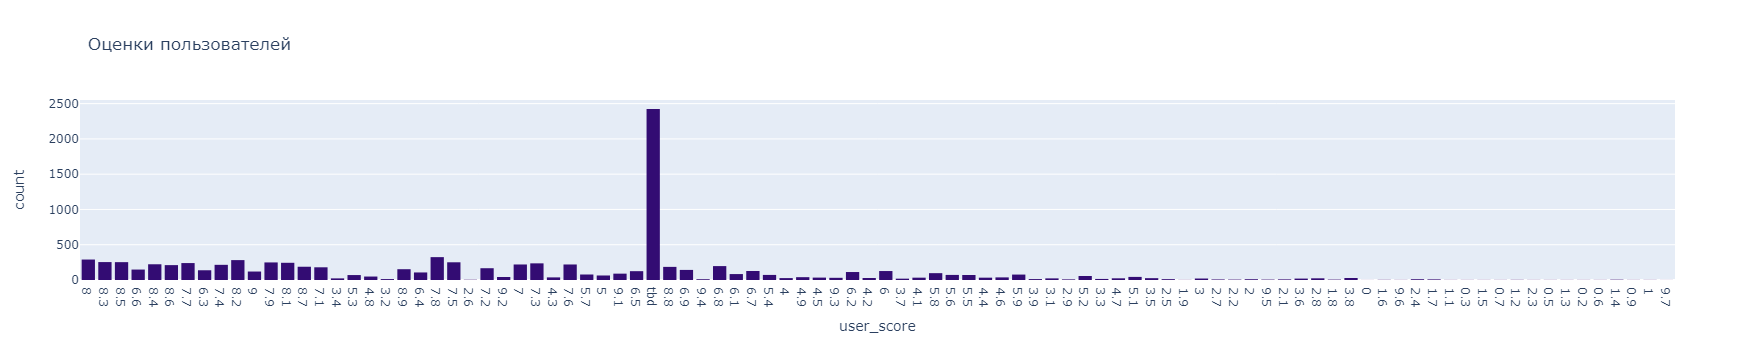

In [10]:
#гистограмма значений в колонке оценки пользователей
px.histogram(df, x='user_score',
             title='Оценки пользователей',
             color_discrete_sequence =['#330C73'])

In [11]:
#замена tbd на 0 в колонке оценки пользователей
df.loc[df['user_score'] == 'tbd','user_score'] = 0

In [12]:
# check
df[df['user_score'] == 0]

name platform  year_of_release  \
119                               Zumba Fitness      Wii             2010   
301              Namco Museum: 50th Anniversary      PS2             2005   
520                             Zumba Fitness 2      Wii             2011   
645                                uDraw Studio      Wii             2010   
657    Frogger's Adventures: Temple of the Frog      GBA                0   
...                                         ...      ...              ...   
16695                           Planet Monsters      GBA             2001   
16697                          Bust-A-Move 3000       GC             2003   
16698                          Mega Brain Boost       DS             2008   
16704                                  Plushees       DS             2008   
16706             Men in Black II: Alien Escape       GC             2003   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
119        Sports      3.45      2.59       0.0         0.66           NaN   
301          Misc      2.08      1.35       0.0         0.54          61.0   
520        Sports      1.51      1.03       0.0         0.27           NaN   
645          Misc      1.65      0.57       0.0         0.20          71.0   
657     Adventure      2.15      0.18       0.0         0.07          73.0   
...           ...       ...       ...       ...          ...           ...   
16695      Action      0.01      0.00       0.0         0.00          67.0   
16697      Puzzle      0.01      0.00       0.0         0.00          53.0   
16698      Puzzle      0.01      0.00       0.0         0.00          48.0   
16704  Simulation      0.01      0.00       0.0         0.00           NaN   
16706     Shooter      0.01      0.00       0.0         0.00           NaN   

      user_score rating  
119            0      E  
301            0   E10+  
520            0      T  
645            0      E  
657            0      E  
...          ...    ...  
16695          0      E  
16697          0      E  
16698          0      E  
16704          0      E  
16706          0      T  

[2424 rows x 11 columns]

In [13]:
#замена типа данных в колонке оценок пользователей на float
df['user_score'] = df['user_score'].astype('float')

### Заполнение и удаление пропусков <a id='5'></a>

In [14]:
#количество пропусков
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

**Дата выхода игры**

Доля пропусков в колонке с годом релиза 2%, поэтому решено удалить эти данные.

In [15]:
df.shape

(16715, 11)

In [16]:
#удаление пропущеных значений в колонке с годом релиза
df = df.loc[df['year_of_release'] > 0]

In [17]:
df.shape

(16446, 11)

**Название и жанр**

В колонках с названием и жанром по 2 пропуска, их тоже удаляем.

In [18]:
#удаление пропущеных значений в колонке с названием
df = df.dropna(subset=['name'])

In [19]:
#удаление пропущеных значений в колонке с жанром
df = df.dropna(subset=['genre'])

**Рейтинг от ESRB**

В колонке с рейтингом от ESRB 40% пропусков. Так как эта органицазия выставляет рейтинг для возрастной категории в текстовом формате, тут будет уместно заменить пропуски на TBD - рейтинг не определен.

In [20]:
#замена пустых значений в рейтинге на tbd
df['rating'] = df['rating'].fillna('TBD')

**Оценки от критиков**

В колонке с оценкой от критиков 43% пропусков. Пустые значения заменю 0, так как таких оценок в датасете нет, данные не исказятся. Под 0 предполагается, что оценки нет.

In [21]:
#описание колонки с оценкой критиков
df['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [22]:
#замена пустых значений в колонке с оценкой от критиков на 0
df['critic_score'] = df['critic_score'].fillna(0)

In [23]:
#замена типа данных в колонке оценок критиков на int
df['critic_score'] = df['critic_score'].astype('int')

**Оценки от пользователей**

В колонке с оценкой от пользователей 40% пропусков. Поэтому пропущенные значения будут так же заменены 0 и предполагается, что оценка отсутствует.

In [24]:
#описание колонки с оценкой пользователей
df['user_score'].describe()

count    9839.000000
mean        5.405407
std         3.317917
min         0.000000
25%         2.400000
50%         6.900000
75%         8.000000
max         9.700000
Name: user_score, dtype: float64

In [25]:
#замена пустых значений в колонке с оценкой от пользователей на 0
df['user_score'] = df['user_score'].fillna(0)

**Исследование причин большой доли пропусков в рейтинге** <a id='6'></a>

В оценках от критиков и пользователей процент пропущенных значение 40-43%. 
Для поиска закономерности создам две переменные:
- Только рейтинг 0 (т.е. пропущенные значения)
- Общее количество записей

После чего объединю данные в одну таблицу и высчитаю процент пропущенных значений. Результаты выведу на график для удобства оценки полученных данных.

In [26]:
#срез с оценками 0 в колонках от критиков и пользователей
check_rating = df.loc[(df['critic_score'] == 0) & (df['user_score'] == 0)]

#группировка по году для дальнейших вычислений
check_rating = check_rating.groupby('year_of_release')['name'].count().reset_index()

In [27]:
#общее количество записей 
check_rating2 = check_rating.groupby('year_of_release')['name'].count().reset_index()

#группировка по году для дальнейших вычислений
check_rating2 = df.groupby('year_of_release')['name'].count().reset_index()

In [28]:
#объединение двух таблиц по году
missing_rating = check_rating2.merge(check_rating, left_on='year_of_release',right_on='year_of_release')

#вычисление доли пропущенных оценок (оценка 0)
missing_rating['percent'] = round(missing_rating['name_y']/missing_rating['name_x']*100)

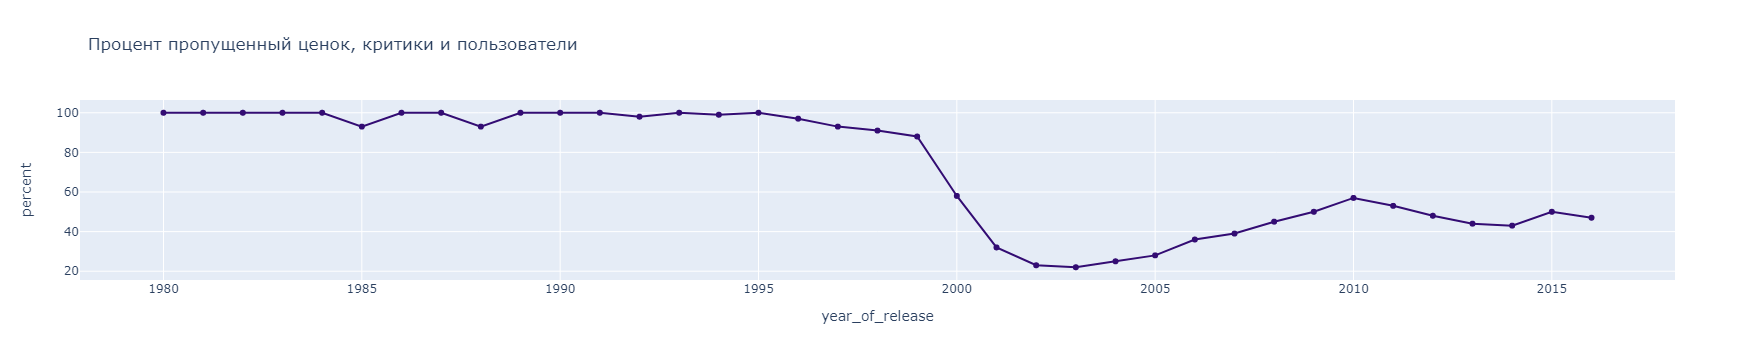

In [29]:
#линейный график упущенных оценок
px.line(missing_rating,
        x='year_of_release',
        y='percent',
        markers=True,
        color_discrete_sequence =['#330C73'],
        title='Процент пропущенный ценок, критики и пользователи')

Можно сделать вывод, что отсутствие рейтинга больше характерно для старых игр, выпущенных до 2000 года.

**Общая информация после внесения изменений**

Проверка на применение изменений, сброс индексов и общая информация.

In [30]:
#количество пропусков после заполнения
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

In [31]:
#сброс индексов после удаления пропусков
df = df.reset_index(drop=True)

In [32]:
#общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.3+ MB


### Поиск дубликатов <a id='7'></a>

**Явные дубликаты**

In [33]:
#проверка на явные дубликаты
df.duplicated().sum()

0

In [34]:
#проверка на дубликаты в названии
df[df['name'].duplicated()].sort_values(by='name')

name platform  year_of_release     genre  \
3810           Frozen: Olaf's Quest       DS             2013  Platform   
1765         007: Quantum of Solace      PS3             2008    Action   
14427        007: Quantum of Solace       PC             2008    Action   
3078         007: Quantum of Solace      Wii             2008    Action   
9359         007: Quantum of Solace       DS             2008    Action   
...                             ...      ...              ...       ...   
3258      pro evolution soccer 2011     X360             2010    Sports   
4599      pro evolution soccer 2011      PS2             2010    Sports   
2546      pro evolution soccer 2011      PSP             2010    Sports   
12450     pro evolution soccer 2011       PC             2010    Sports   
15365  uDraw Studio: Instant Artist     X360             2011      Misc   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
3810       0.21      0.26      0.00         0.04             0         0.0   
1765       0.43      0.51      0.02         0.19            65         6.6   
14427      0.01      0.01      0.00         0.00            70         6.3   
3078       0.29      0.28      0.01         0.07            54         7.5   
9359       0.11      0.01      0.00         0.01            65         0.0   
...         ...       ...       ...          ...           ...         ...   
3258       0.09      0.44      0.00         0.07            79         5.9   
4599       0.04      0.21      0.05         0.11             0         6.7   
2546       0.05      0.30      0.29         0.16            74         5.8   
12450      0.00      0.05      0.00         0.01            79         0.0   
15365      0.01      0.01      0.00         0.00            54         5.7   

      rating  
3810     TBD  
1765       T  
14427      T  
3078       T  
9359       T  
...      ...  
3258       E  
4599       E  
2546       E  
12450    TBD  
15365      E  

[5018 rows x 11 columns]

Дубликаты в названии - это реализация игры на разных платформах.

**Неявные дубликаты в жанре, названии платформы и рейтинге ESRB**

In [35]:
#поиск неявных дубликатов в жанре
df['genre'].sort_values(ascending=True).unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [36]:
#поиск неявных дубликатов в названии платформы
df['platform'].sort_values(ascending=True).unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [37]:
df['rating'].sort_values(ascending=True).unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'TBD'],
      dtype=object)

**Сумма продаж во всех регионах**

In [38]:
#добавление колонке с суммой продаж по всем регионам для каждой строки
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

### Вывод <a id='8'></a>

**На предобработке данных сделано:**
- Названия колонок приведены к нижнему регистру
- Исправлены типы данных в колонках: год релиза, оценки от критиков, оценки от пользователей.
- Пропуски в оценке критиков, пользователей заменены на **0** как отсутствие значений. Замена на среднее или медиану исказит данные.
- Значение **tbd** как отсутствие значений в колонке оценок пользователей также заменены на 0.
- Пропуски в колонке с рейтингом от ESBR наоборот были заменены на **TBD** - рейтинг не определен.
- Удалены пропущенные значения в колонках с именем, годом выхода и жанром.
- Явные и неявные дубликаты не обнаружены. Повторы названий игр в колонке с именем — это релиз игры на разных платформах.
- Добавлен новый столбец с итоговой суммой продаж по всем регионам.

**Причины возникновения пропусков:**
- Система ESRB используется в США, Мексике и Канаде. Издатель игр либо не планировал распространение своего продукта в этих странах, либо информация была собрана некорректно, и информация о рейтинге не попала в выгрузку.
- Большая доля пропусков в колонках с оценками от пользователей и критиков говорит либо об их отсутствии (из графика можно сделать вывод, что это характерно для старых игр до 2000 года), либо о некорректном сборе и выгрузке информации(для игр от 2001 года).

## Исследовательский анализ данных <a id='9'></a>

### Количество выпускаемых игр по годам <a id='10'></a>

In [39]:
#сводная таблица по количеству игр за год 
games_for_year = df.pivot_table(
    index='year_of_release',
    values=['name'],aggfunc='count').reset_index()

In [40]:
#сводная таблица по количеству игр за год по разным жанрам
games_for_year2 = df.pivot_table(
    index=['year_of_release','genre'],
    values=['name'],aggfunc='count').reset_index()

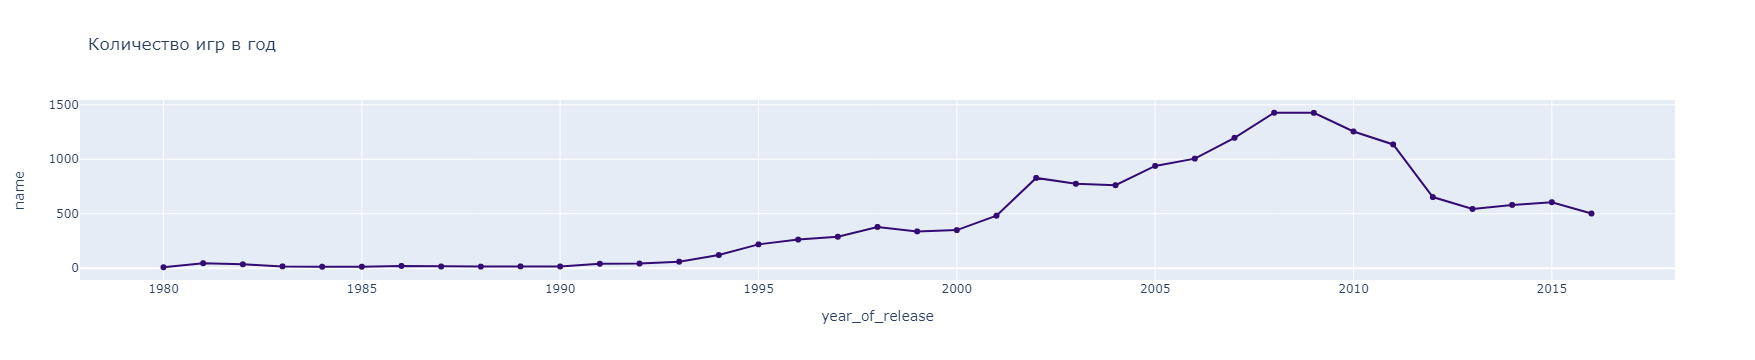

In [41]:
#линейный график по количеству игр в год
px.line(games_for_year,
        x='year_of_release',
        y='name',
        markers=True,
        color_discrete_sequence =['#330C73'],
        title='Количество игр в год')

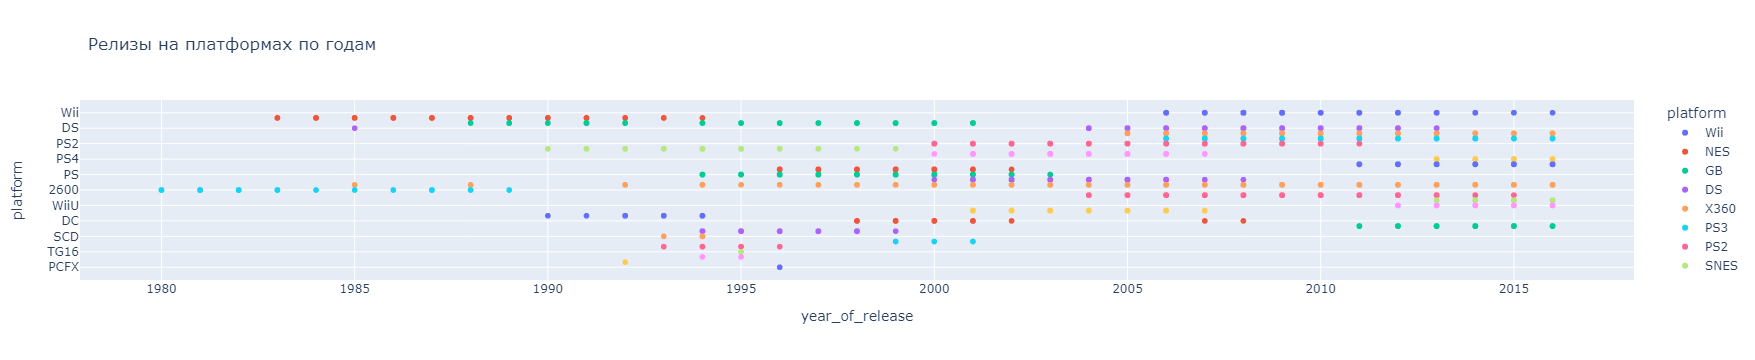

In [42]:
#релизы игр по годам на различных платформах
px.scatter(df, x='year_of_release', y='platform',
           color='platform',
           title='Релизы на платформах по годам')

Из графиков можно выделить две переломные точки: 1994г и 2000г.

- C 1994 года количество выпускаемых игр начинает плавно увеличиваться.
- С 2000 по 2002 идет резкий скачок, как можно предположить из графиков, это связано с появлением 3 новых платформ, в том числе PS2.
- Рост продолжается вплоть до 2008 года, затем идет сильное падение вниз. Из графика видно, что к 2008 исчезло несколько игровых платформ, а новых не появлялось до 2011.
- В 2011 появилось несколько новых игровых приставок, поэтому цифры выровнялись.

### Продажи по платформам <a id='11'></a>

**Распределение продаж платформ по годам**

In [43]:
#сводная таблица по сумме продаж между платформами по годам
plt_sales = df.pivot_table(index=['year_of_release','platform'],
                                values='total_sales',aggfunc='sum').reset_index()
#первые 5 строк таблицы
plt_sales.head()

year_of_release platform  total_sales
0             1980     2600        11.38
1             1981     2600        35.68
2             1982     2600        28.88
3             1983     2600         5.84
4             1983      NES        10.96

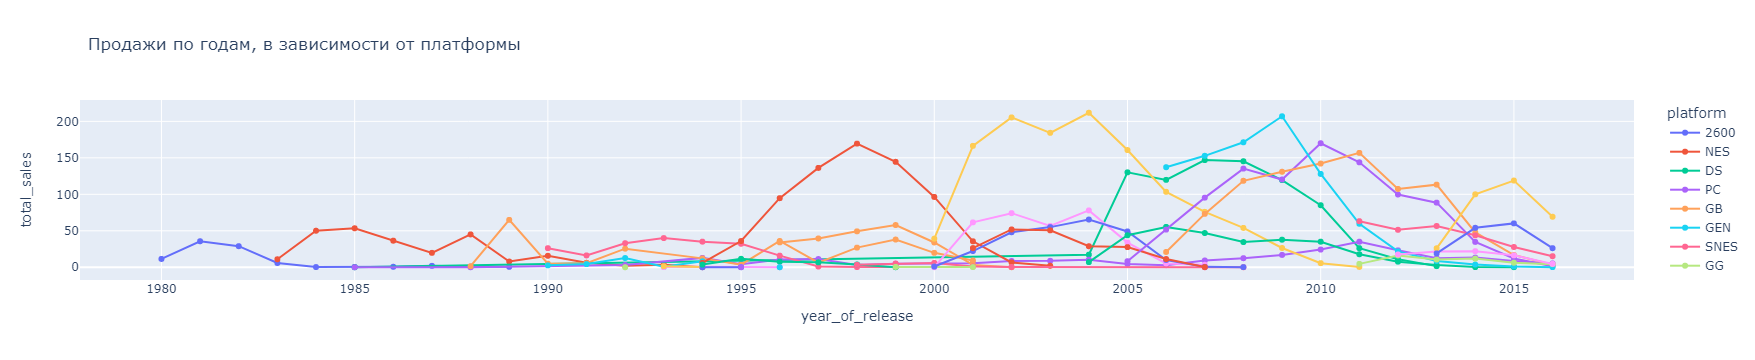

In [44]:
#линейный график по количеству продаж за год, с возможностью сортировки по платформе
px.line(plt_sales, x='year_of_release', y='total_sales',
        color='platform', markers=True,
        title='Продажи по годам, в зависимости от платформы')

**Общие продажи по каждой платформе**

In [45]:
#сводная таблица платформ с итоговой суммой продаж за все годы
pre_top = plt_sales.pivot_table(index=['platform'],values='total_sales',
                                aggfunc='sum').reset_index().sort_values(by='total_sales',
                                                                         ascending=False)
pre_top.head()

platform  total_sales
16      PS2      1233.56
28     X360       961.24
17      PS3       931.34
26      Wii       891.18
4        DS       802.78

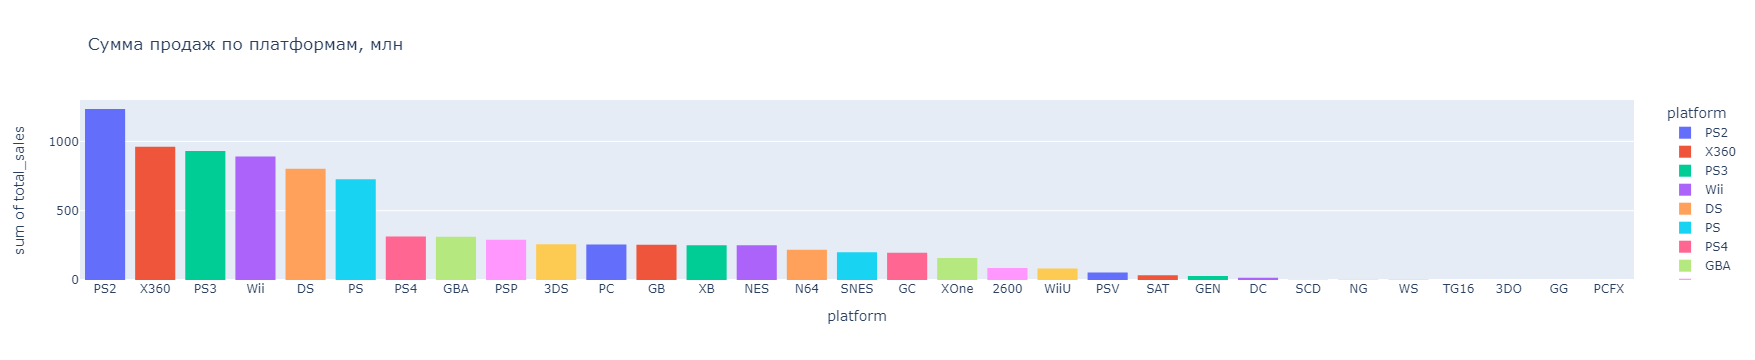

In [46]:
#гистограма продаж за все время по платформам
px.histogram(pre_top, x='platform', y='total_sales',
             color='platform',
             title='Сумма продаж по платформам, млн')

Из полученных данных можно выделить 6 платформ с продажами больше 600 млн. - PS2, X360, PS3, Wii, PS и DS.

Данные платформы будут выделены в топ успешных.

### Топ платформ по продажам <a id='12'></a>

In [47]:
#фильтрация топ платформ через подготовительную таблицу 
top6 = plt_sales.loc[plt_sales['platform'].isin(pre_top['platform'].head(6))
                    ].sort_values(by='year_of_release',ascending=False)

#итоговая таблица с топ 6 платформами с продажами по годам
top6.head()

year_of_release platform  total_sales
236             2016     X360         1.52
234             2016      Wii         0.18
231             2016      PS3         3.60
227             2015     X360        11.96
225             2015      Wii         1.14

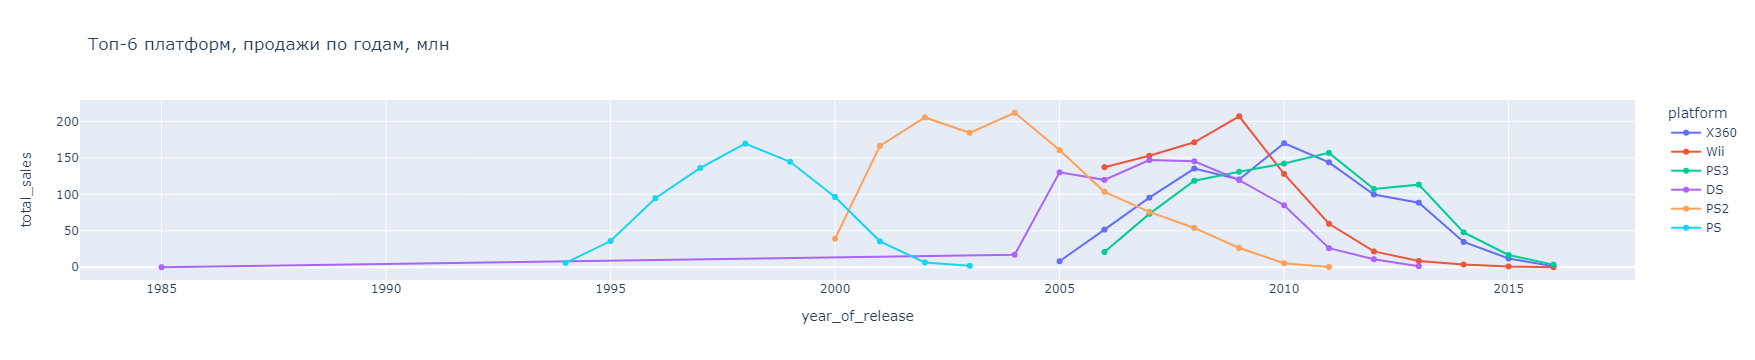

In [48]:
#линейный график с топ-6 платформами с продажами по годам
px.line(top6,x='year_of_release',y='total_sales',
        color='platform',markers=True,
        title=('Топ-6 платформ, продажи по годам, млн'))

Можно заметить, что практически все топовые платформы в среднем доходят до пика выручки в течении 3-5 лет, затем продажи идут на спад.

### Срок жизни платформы <a id='13'></a>

In [49]:
#срез колонок с платформами и годом релиза, удаление дубликатов
plt_life = df.loc[:,['platform','year_of_release']].drop_duplicates()

Удалю строку с выбросом у платформы DS в 1985 году. Также из расчетов будет убран персональный компьютер, чтобы расчитать срок жизни приставок.

In [50]:
#удаление записи 1985 года платформы DS
plt_life = plt_life.drop(index=[15704])

In [51]:
#убираю все записи с PC
plt_life = plt_life.loc[plt_life['platform'] != 'PC']

In [52]:
#сводная таблица с подсчетом количества лет каждой платформы
plt_life2 = plt_life.pivot_table(index='platform',values='year_of_release',
                                aggfunc='count').reset_index().sort_values(by='year_of_release', ascending=False)

#описание таблицы
plt_life2.describe()

year_of_release
count        30.000000
mean          7.033333
std           3.809999
min           1.000000
25%           4.000000
50%           7.000000
75%          10.000000
max          13.000000

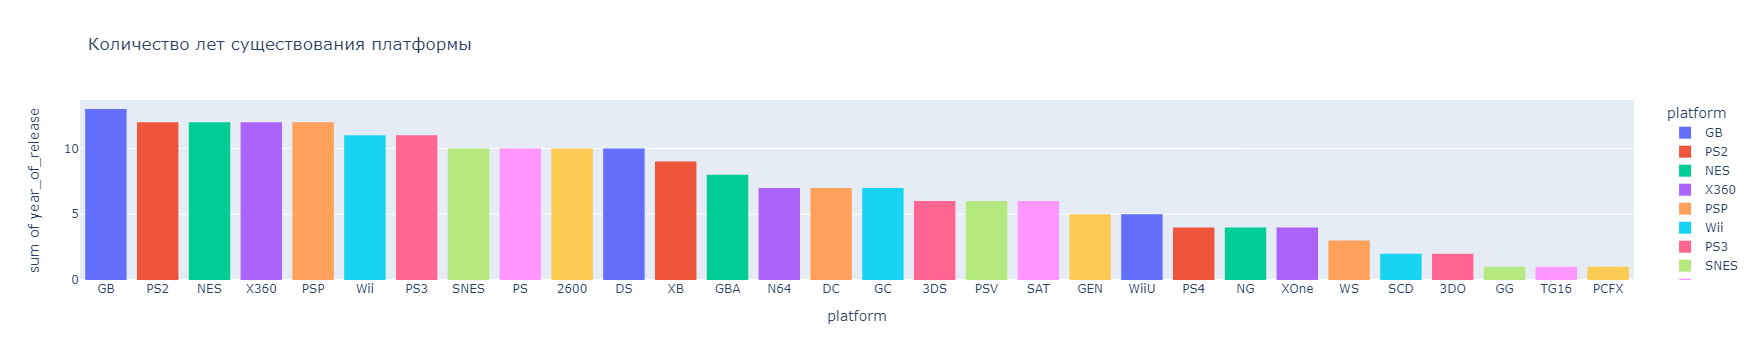

In [53]:
#гистограмма срока жизни платформ
px.histogram(plt_life2, x='platform', y='year_of_release',
             color='platform',
             title='Количество лет существования платформы')

Медианный срок жизни платформы составляет 7 лет. А топовые платформы находятся в границе 10+ лет.

**Сколько платформ появлялось за год**

In [54]:
#срез данных по году появления новой платформы
first_year = plt_life.groupby('platform')['year_of_release'
                                        ].min().reset_index()

#группировка по году с количеством новых платформ
new_platform = first_year.groupby('year_of_release')['platform'].count().reset_index()

#среднее количество новых платформ в год
new_platform['platform'].describe()

count    19.000000
mean      1.578947
std       0.692483
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: platform, dtype: float64

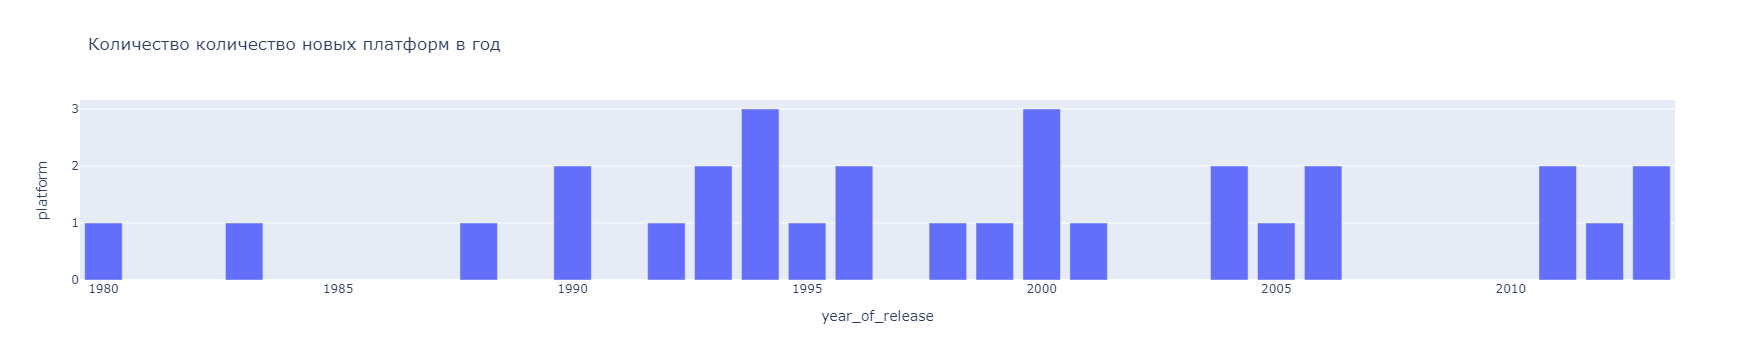

In [55]:
#гистограмма распределения новых платформ по годам
px.bar(new_platform,
       x='year_of_release',
       y='platform',
       title='Количество количество новых платформ в год')

В среднем, за год появляется 1 новая игровая платформа.
А в переломные моменты (когда в 1994 и 2000 года количество игр начало стремительно расти) появилось по 3 новые платформы.

### Актуализация данных <a id='14'></a>

- Учитывая то, что данные за 2016 год неполные, актуальный срок будет взят в 4 года.
- Уберу неактуальные платформы

In [56]:
#исключение данных до 2006 года
good_df = df.loc[df['year_of_release'] >= 2013]

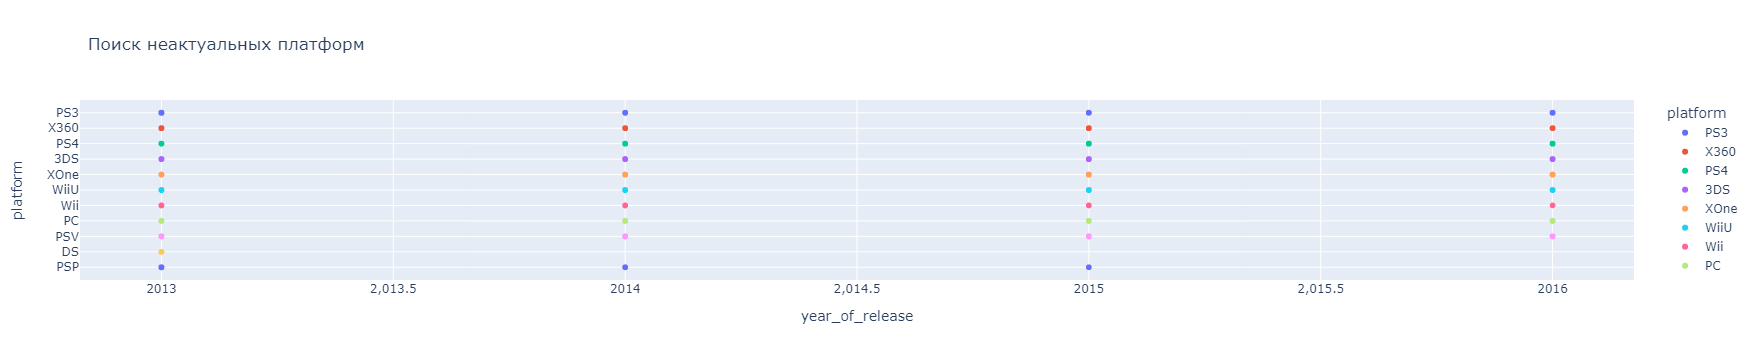

In [57]:
#поиск платформ, переставших выпускать игры к 2016
px.scatter(good_df, x='year_of_release', y='platform',
           color='platform',
           title='Поиск неактуальных платформ')

Такие платформы как DS и PSP перестали выпускать игры к 2016 году, поэтому их стоит исключить из датасета.

PSP не выпускали игры только в 2016, но продажи в 2015 упали слишком низко, чтобы считать, что данная платформа останется актуальной к 2017.

In [58]:
#список платформ на удаление
delete = ['DS', 'PSP']

#срез данных с удалением неактуальных платформ
good_df = good_df.loc[~df['platform'].isin(delete)]

Список актуальных платформ

In [59]:
#актуальный список
good_df['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV'],
      dtype=object)

In [60]:
#итоговый датафрейм
good_df.head()

name platform  year_of_release         genre  \
16         Grand Theft Auto V      PS3             2013        Action   
23         Grand Theft Auto V     X360             2013        Action   
31  Call of Duty: Black Ops 3      PS4             2015       Shooter   
33        Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
42         Grand Theft Auto V      PS4             2014        Action   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16      7.02      9.09      0.98         3.96            97         8.2   
23      9.66      5.14      0.06         1.41            97         8.1   
31      6.03      5.86      0.36         2.38             0         0.0   
33      5.28      4.19      4.35         0.78             0         0.0   
42      3.96      6.31      0.38         1.97            97         8.3   

   rating  total_sales  
16      M        21.05  
23      M        16.27  
31    TBD        14.63  
33    TBD        14.60  
42      M        12.62

In [61]:
#общая информация
good_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2158 entries, 16 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2158 non-null   object 
 1   platform         2158 non-null   object 
 2   year_of_release  2158 non-null   int32  
 3   genre            2158 non-null   object 
 4   na_sales         2158 non-null   float64
 5   eu_sales         2158 non-null   float64
 6   jp_sales         2158 non-null   float64
 7   other_sales      2158 non-null   float64
 8   critic_score     2158 non-null   int32  
 9   user_score       2158 non-null   float64
 10  rating           2158 non-null   object 
 11  total_sales      2158 non-null   float64
dtypes: float64(6), int32(2), object(4)
memory usage: 202.3+ KB


### Актуальные лидеры продаж <a id='15'></a>

In [62]:
#сводная таблица по сумме продаж между платформами по годам
sales = good_df.pivot_table(index=['year_of_release','platform'],
                                values='total_sales',aggfunc='sum').reset_index()

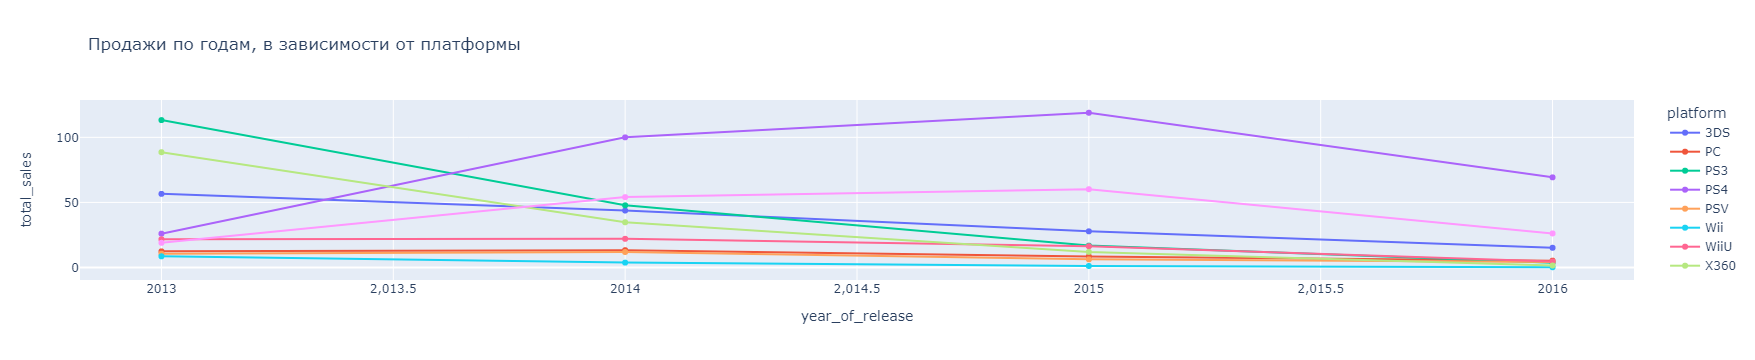

In [63]:
#линейный график по количеству продаж за год, с возможностью сортировки по платформе
px.line(sales, x='year_of_release', y='total_sales',
        color='platform', markers=True,
        title='Продажи по годам, в зависимости от платформы')

График выглядит удручающе, на всех платформа продажи сильно упали c 2014 по 2015.

- Из лидеров можно выделить: PS4, XOne.
- Хуже всего с продажами у Wii

### Исследование падения выручки <a id='16'></a>

Посмотрю количество выпускаемых игр и жанров по соотношению к выручке. Необходимо понять, чем обусловлен спад.

**Выручка к количеству игр**

In [64]:
#сводная таблица с подсчетом жанров и выручки по годам
total_games = good_df.pivot_table(index=['year_of_release','platform'],
                              values=['name','total_sales'],
                              aggfunc={'name':'count','total_sales':'sum'}
                            ).reset_index()

In [65]:
#первые пять строк
total_games.head()

year_of_release platform  name  total_sales
0             2013      3DS    91        56.57
1             2013       PC    38        12.38
2             2013      PS3   126       113.25
3             2013      PS4    16        25.99
4             2013      PSV    63        10.59

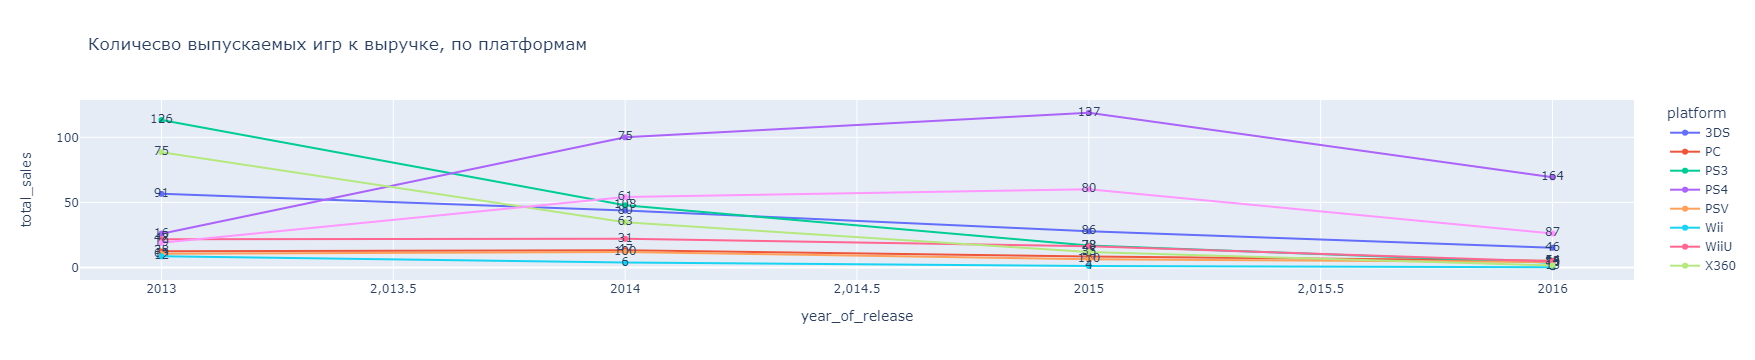

In [66]:
#линейный график по количеству выпускаемых игр
px.line(total_games,
        x='year_of_release',
        y='total_sales',
        color='platform',
        text='name',
        title='Количесво выпускаемых игр к выручке, по платформам')

- На **PC** количество игр растет, прибыль падает.
- На **PS3** с 2013 идет спад вплоть до 2016. 126 игр против 38.
- У **X360** количество игр сокращалось с 2013. На 2016 год они выпустили только 13 игр.
- У **3DS** также наблюдается падение выручки и количества выпускаемых игр.
- **PSV** увеличили количество игр в 2015, но прибыль не выросла, в 2016 уже 85 игр.
- У **WiiU** с 2014 падает выручка и количество игр.
- **Wii** с 2013 по 2016 выпустила всего 23 игры.
- Обратная ситуация у **PS4** и **XOne** - растет количесво игр и прибыль. За 2016 данные не полные, однако при росте количесва игр, выручка заметно ниже 2015 года.

**Количество жанров к выручке**

In [67]:
#подготовительная сводная для подсчета жанра
pre_total_genres = good_df.pivot_table(index=['year_of_release','platform','genre'],
                                       values='total_sales',
                                       aggfunc='sum').reset_index()

In [68]:
#первые 5 срочек
pre_total_genres.head()

year_of_release platform      genre  total_sales
0             2013      3DS     Action        11.98
1             2013      3DS  Adventure         1.76
2             2013      3DS   Fighting         0.11
3             2013      3DS       Misc         3.25
4             2013      3DS   Platform         4.81

In [69]:
#итоговая сводная по количеству жанров и общей выручке
total_genres = pre_total_genres.pivot_table(index=['year_of_release','platform'],
                                            values=['genre','total_sales'],
                                            aggfunc={'genre':'count','total_sales':'sum'}).reset_index()

In [70]:
#первые 5 срочек
total_genres.head()

year_of_release platform  genre  total_sales
0             2013      3DS     11        56.57
1             2013       PC      9        12.38
2             2013      PS3     11       113.25
3             2013      PS4      8        25.99
4             2013      PSV      9        10.59

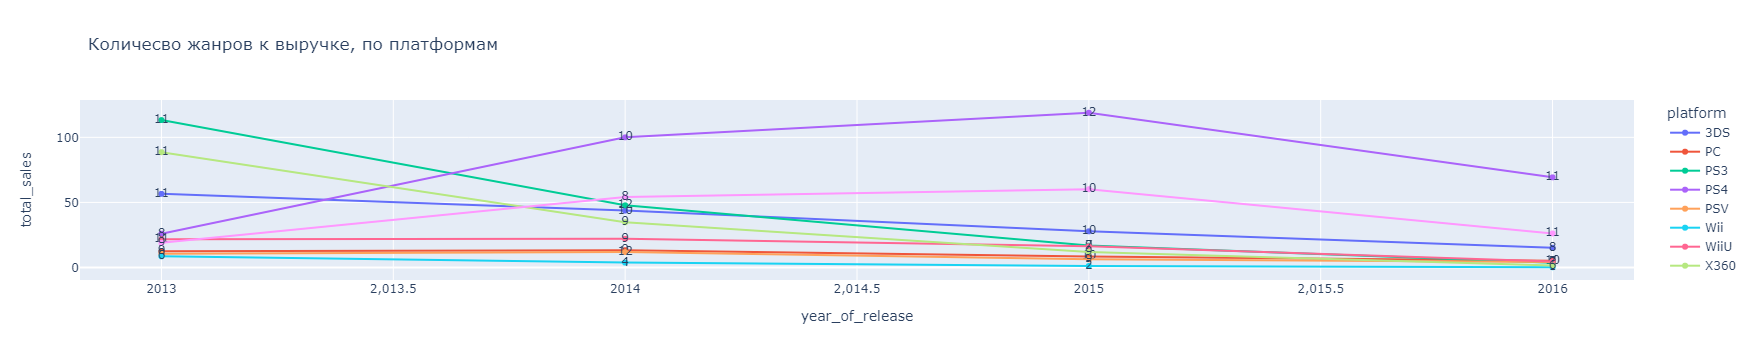

In [71]:
#линейный график по количеству выпускаемых жанров к выручке
px.line(total_genres,
        x='year_of_release',
        y='total_sales',
        color='platform',
        text='genre',
        title='Количесво жанров к выручке, по платформам')

Количество жанров менялост незначительно, и это обусловлено сокращением выходящих на платформах игр.

**Вывод** <a id='17'></a>

Падение выручки и уменьшение количества выпускаемых игр (а с ними и жанров) обусловлено высокой конкуренцией.

После выхода PS4 и XOne, такие платформы как PS3 и X360 стали менее актуальными и устаревшими, соответственно поддержка этих платформ и выпуск игр ушел на второй план. И так как, **Microsoft (XOne)** и **Sony (PS4)** прямые конкуренты, спад выручки связан с их битвой за аудиторию, подписочные сервисы и низкие цены. Поэтому количество игр продолжало расти, а цены падать.

### "Ящик с усами" глобальных продаж <a id='18'></a> 

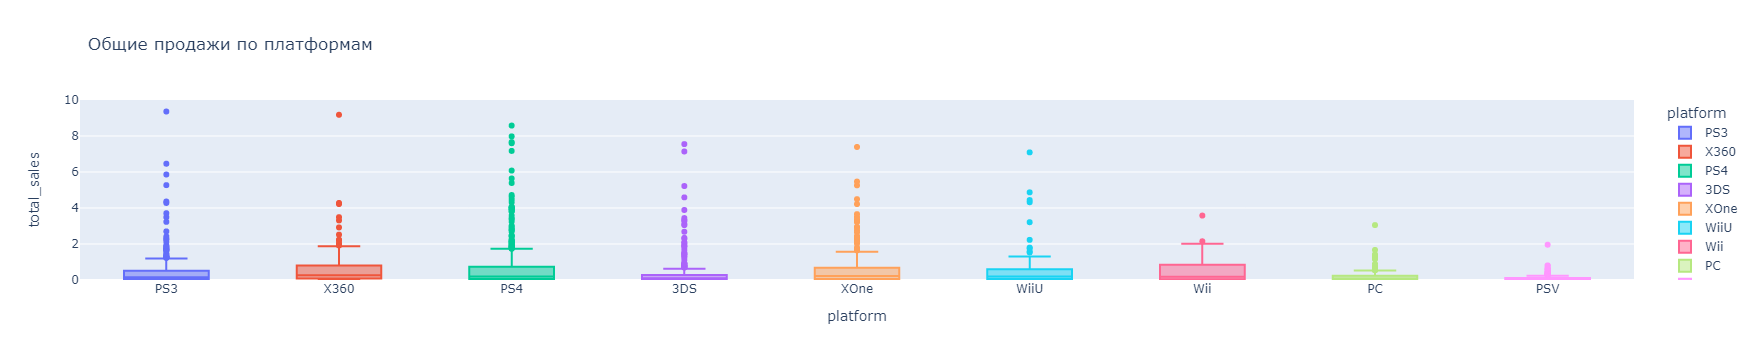

In [72]:
#ящик с усами по продажам на платформах
fig = px.box(good_df,
       x='platform',
       y='total_sales',
       color='platform',
       title='Общие продажи по платформам')
#изменение масштаба
fig.update_layout(yaxis=dict(range=[0,10]))

Наибольшая медиана по выручке у X360 и PS3. Самая маленькая медиана у PSV. Небольшая выручка у PC объясняется меньшей цененой за одну копию игры в сравнении с консолями. У всех платформ также присутствуют выбросы, данный факт можно связать с выходом игр, вокруг которых был большой ажиотаж ("выстрелили" на релизе).

### Влияние отзывов на продажи <a id='19'></a>

**Платформа PS4**

Рассмотреть влияние отзывов на продажи я решила на примере PS4, так как на текущий момент эта платформа лидирует по выручке.

In [73]:
#переменная с данными только по PS4
ps4 = good_df.loc[good_df['platform'] == 'PS4']

In [74]:
ps4.head()

name platform  year_of_release    genre  \
31       Call of Duty: Black Ops 3      PS4             2015  Shooter   
42              Grand Theft Auto V      PS4             2014   Action   
77                         FIFA 16      PS4             2015   Sports   
87    Star Wars Battlefront (2015)      PS4             2015  Shooter   
92  Call of Duty: Advanced Warfare      PS4             2014  Shooter   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
31      6.03      5.86      0.36         2.38             0         0.0   
42      3.96      6.31      0.38         1.97            97         8.3   
77      1.12      6.12      0.06         1.28            82         4.3   
87      2.99      3.49      0.22         1.28             0         0.0   
92      2.81      3.48      0.14         1.23            83         5.7   

   rating  total_sales  
31    TBD        14.63  
42      M        12.62  
77      E         8.58  
87    TBD         7.98  
92      M         7.66

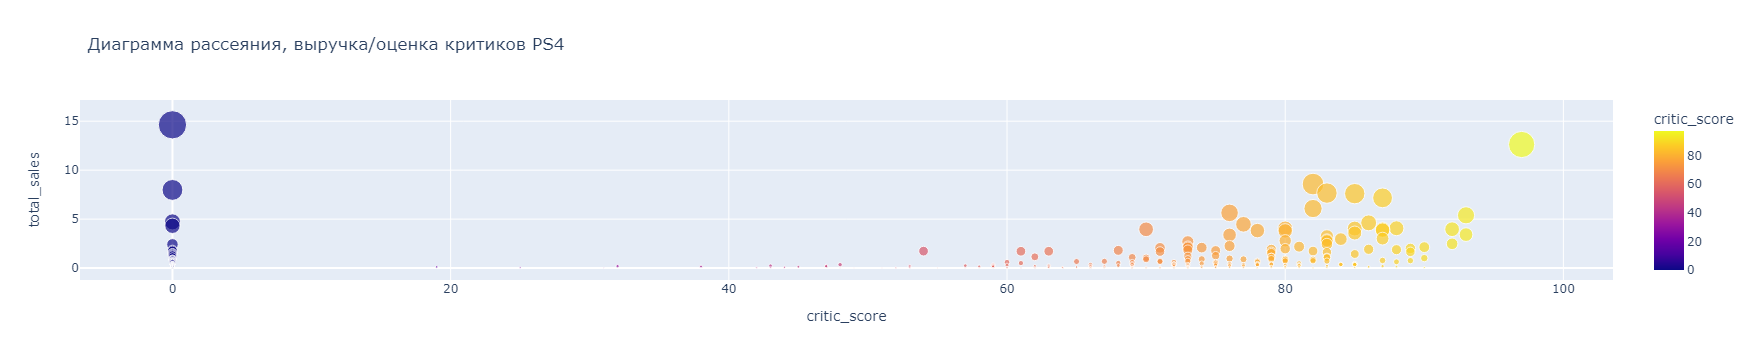

In [75]:
#диаграмма рассеяния для оценки критиков
px.scatter(ps4,
           x='critic_score',
           y='total_sales',
           color = 'critic_score',
           size='total_sales',
           title='Диаграмма рассеяния, выручка/оценка критиков PS4')

Заметна положительная зависимость выручки от оценок критиков. Это объясняется тем, что критики, журналисты и блогеры, имея влияние на большую аудиторию, получают доступ к играм на 2 недели раньше старта продаж (пресс-релиз). И чем больше положительных отзывов получит игра до старта, тем больше людей купит ее в первые дни. И только потом идут дополнительные продажи, где ориентируются на отзывы игроков.

На графике присутствуют выбросы без оценок, но с высокой выручкой. Предполагаю, что отсутствующие оценки все же являются некорректной выгрузкой.

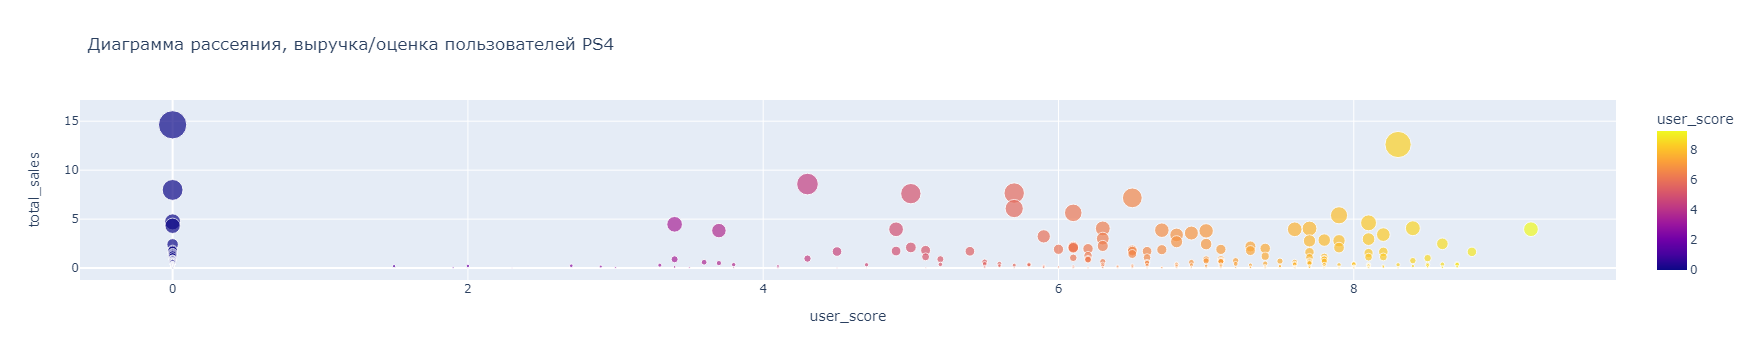

In [76]:
#диаграмма рассеяния для оценки пользователей
px.scatter(ps4,
           x='user_score',
           y='total_sales',
           color = 'user_score',
           size='total_sales',
           title='Диаграмма рассеяния, выручка/оценка пользователей PS4')

Оценки пользователей, судя по графику, практически не влияют на продажи, и также присутствуют выбросы с отсутствующими оценками.

Для оценки корреляцию уберу данные с оценкой 0 от критиков и пользователей.

In [77]:
#убираю из списка отсутсвующие значения в оценках
ps4 = ps4.loc[(ps4['user_score'] != 0) & (ps4['critic_score'] != 0)]

In [78]:
#корреляция по различным параметрам
ps4[['total_sales','user_score','critic_score']].corr()

total_sales  user_score  critic_score
total_sales      1.000000   -0.033625      0.405895
user_score      -0.033625    1.000000      0.557654
critic_score     0.405895    0.557654      1.000000

Предположения, сделанные по диаграммам рассеяния подтвердились. Корреляция оценки критиков положительная (0.4), а корреляция оценок пользователей очень слабая (-0.03).

**Платформа Xbox One**

Чтобы сделать более корректные выводы, аналогично рассмотрю корреляцию второй популярной платформы - XOne.

In [79]:
#переменная с данными только по PS4
xbox = good_df.loc[good_df['platform'] == 'XOne']

In [80]:
#первые 5 строчек
xbox.head()

name platform  year_of_release         genre  \
99        Call of Duty: Black Ops 3     XOne             2015       Shooter   
165              Grand Theft Auto V     XOne             2014        Action   
179  Call of Duty: Advanced Warfare     XOne             2014       Shooter   
241               Halo 5: Guardians     XOne             2015       Shooter   
269                       Fallout 4     XOne             2015  Role-Playing   

     na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
99       4.59      2.11      0.01         0.68             0         0.0   
165      2.81      2.19      0.00         0.47            97         7.9   
179      3.22      1.55      0.01         0.48            81         5.4   
241      2.78      1.27      0.03         0.41            84         6.4   
269      2.51      1.32      0.01         0.38            88         6.2   

    rating  total_sales  
99     TBD         7.39  
165      M         5.47  
179      M         5.26  
241      T         4.49  
269      M         4.22

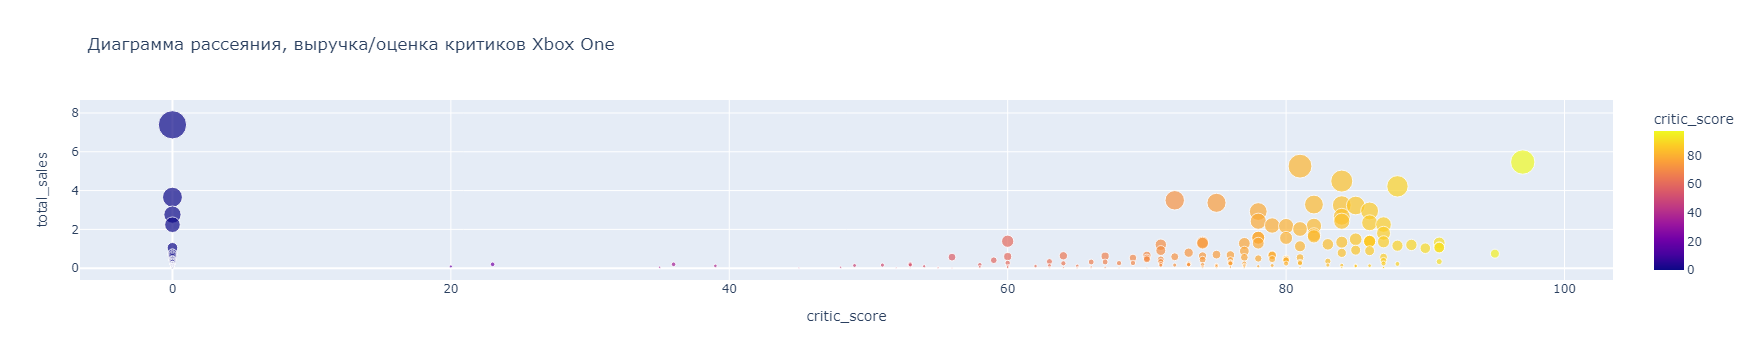

In [81]:
#диаграмма рассеяния для оценки критиков
px.scatter(xbox,
           x='critic_score',
           y='total_sales',
           color = 'critic_score',
           size='total_sales',
           title='Диаграмма рассеяния, выручка/оценка критиков Xbox One')

График выглядит практически идентичным с PS4. Заметно влияние критиков, а также выбросы скорее всего были с высокой оценкой, но были утеряны при выгрузке.

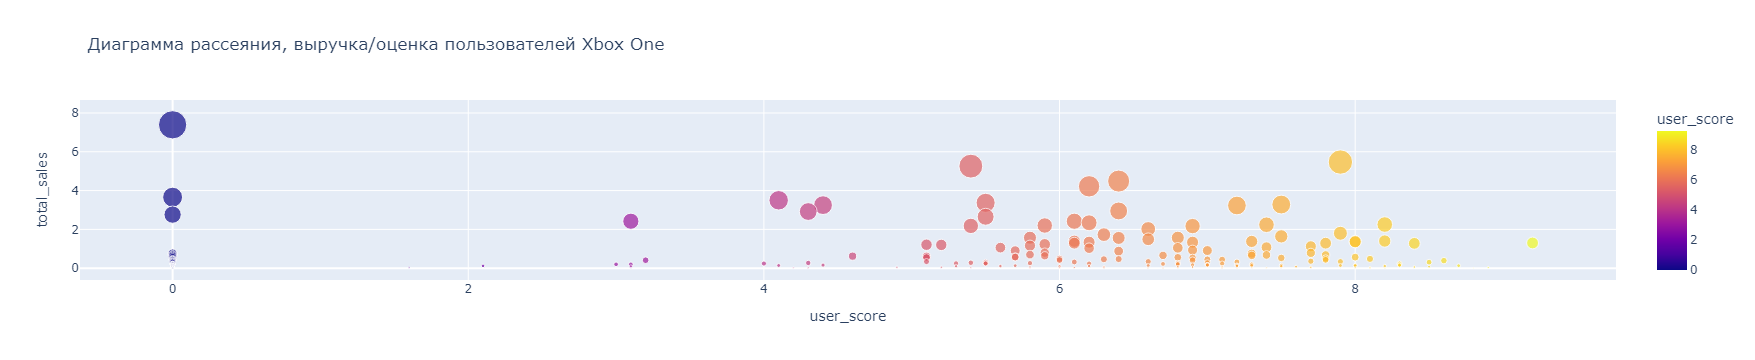

In [82]:
#диаграмма рассеяния для оценки пользователей
px.scatter(xbox,
           x='user_score',
           y='total_sales',
           color = 'user_score',
           size='total_sales',
           title='Диаграмма рассеяния, выручка/оценка пользователей Xbox One')

Прямого влияния оценок пользователей на продажи не наблюдается.

In [83]:
#убираю из списка отсутсвующие значения в оценках
xbox = xbox.loc[(xbox['user_score'] != 0) & (xbox['critic_score'] != 0)]

In [84]:
#корреляция по различным параметрам
xbox[['total_sales','user_score','critic_score']].corr()

total_sales  user_score  critic_score
total_sales      1.000000   -0.094003      0.410422
user_score      -0.094003    1.000000      0.472462
critic_score     0.410422    0.472462      1.000000

Коэффициент корреляции оценок от критиков положительный (0.4), корреляция оценок пользователей также очень слабая (-0.09).

Для полной уверенности я рассмотрела корреляцию PS3, но ситуация оказалась аналогичной двум предыдущим и я не стала включать эти данные в проект.

**Вывод** <a id='20'></a>

- Оценки критиков напрямую влияют на количество продаж, они имеют влияние на огромную аудиторию. Плюс, в течении тех двух недель раннего доступа к игре, они подогревают интерес своей публики и привлекают внимание к продукту. За счёт этих факторов, на релизе игры она может "выстрелить" и принести компании большую прибыль в первые дни продаж.

- Оценки пользователей наоборот очень слабо влияют на условные дополнительные продажи игры, когда с течением времени потенциальный покупатель выбирает игру, ориентируясь на отзывы игроков.

### Прибыльные жанры <a id='21'></a>

Для начала, посмотрю какую долю в процентах занимает каждый жанр.

In [85]:
#подсчет доли каждого жанра с сортировкой
genres_mean = (good_df.groupby('genre')['genre'].count()/len(good_df)*100).sort_values(ascending=False)

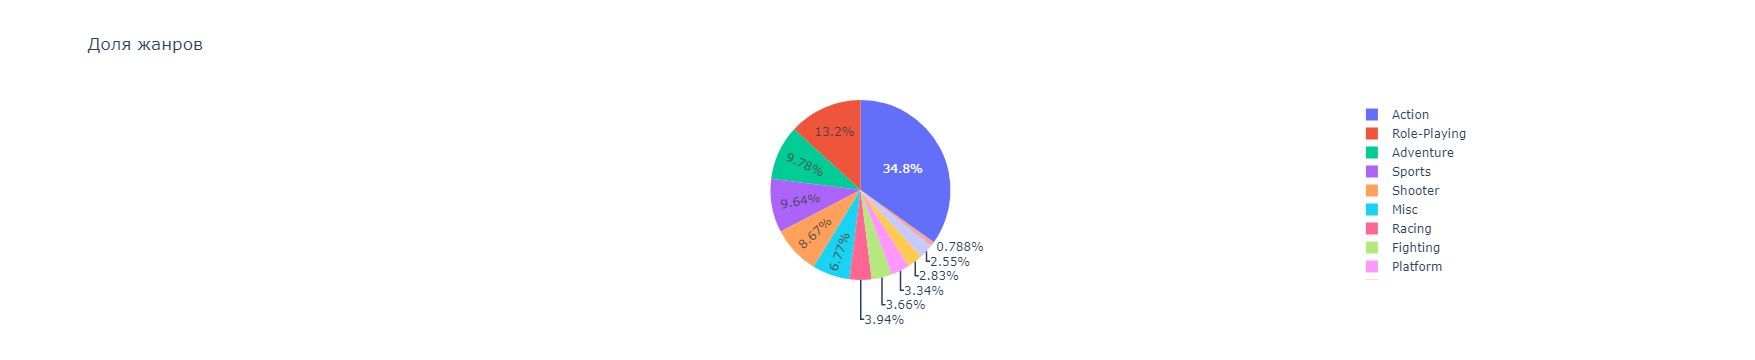

In [86]:
#круговая диаграмма распределения жанров
px.pie(genres_mean,
       values='genre',
       names=genres_mean.index,
       title = 'Доля жанров')

- Первое место (почти 35%) занимают игры в жанре Экшн. Это обусловлено тем, что он достаточно обширный и включает в себя множество поджанров (файтинги, шутеры,платформеры и тд.).
- Второй по популярности жанр - РПГ.
- За ним идут - приключенческие игры, шутеры и спорт.

Теперь посмотрим на распределение прибыли по годам.

In [87]:
#сводная по жанрам
genre_sales = pre_total_genres.pivot_table(index =['genre','year_of_release'],
                                           values='total_sales',
                                           aggfunc='sum').reset_index()

In [88]:
#первые 5 срочек
genre_sales.head()

genre  year_of_release  total_sales
0     Action             2013       121.35
1     Action             2014        97.15
2     Action             2015        71.90
3     Action             2016        30.11
4  Adventure             2013         5.40

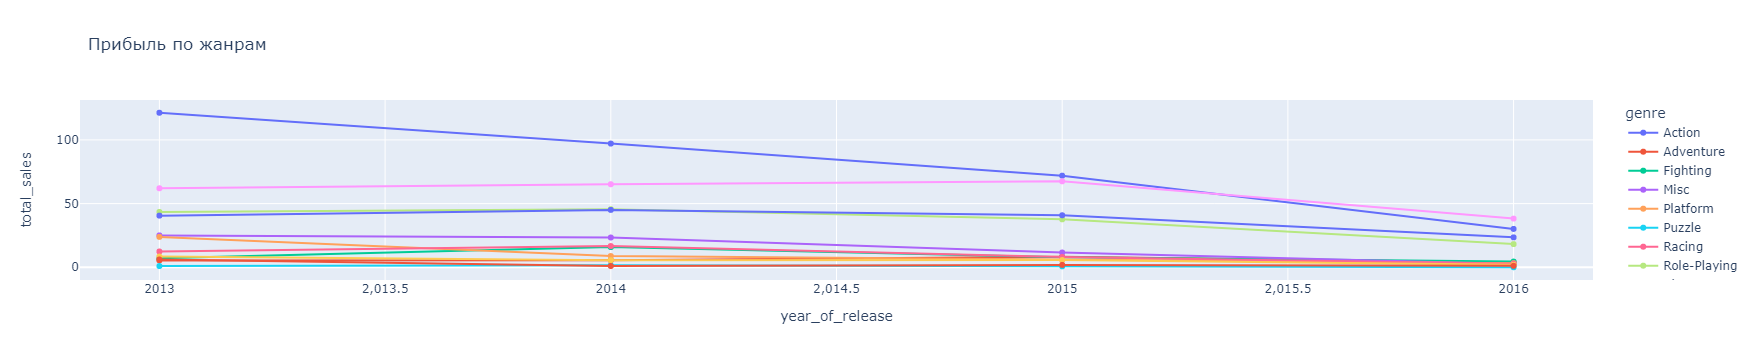

In [89]:
#линейный график по количеству выпускаемых жанров к выручке
px.line(genre_sales,
        x='year_of_release',
        y='total_sales',
        color='genre',
        markers=True,
        title='Прибыль по жанрам')

- В 2015 самый прибыльный жанр - Экшн. Однако, судя по графику, Шутеры идут практически вровень с ним по выручке.
- Вторая группа это Спортивные и Ролевые игры.

Чтобы убедиться в этом, посмотрю общую выручку за все годы по жанрам.

In [90]:
#общая прибль по жанрам
genre_total_sales = genre_sales.pivot_table(index='genre',
                                            values='total_sales',
                                            aggfunc='sum').sort_values(by='total_sales',
                                                                       ascending=False).reset_index()

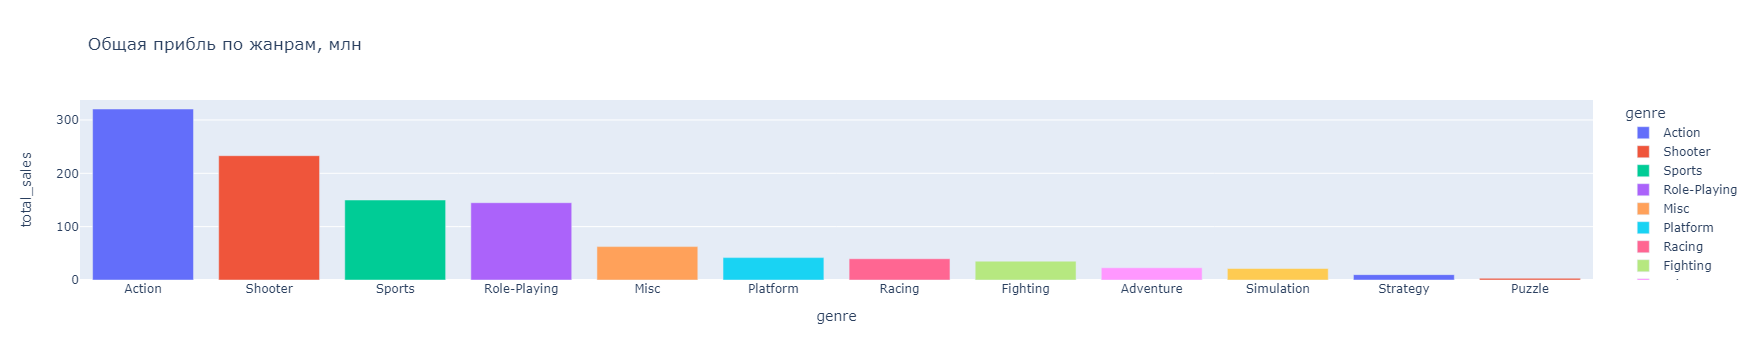

In [91]:
#график общей прибыли по жанрам
px.bar(genre_total_sales,
       x='genre',
       y='total_sales',
       color='genre',
       title='Общая прибль по жанрам, млн')

- Учитывая, что экшн игры занимают 35% рынка, они занимают лидирующую позицию по общей прибыли.
- Однако, шутеры с долей в 9% занимают второе место.
- На третьем месте спортивные и ролевые игры.
- Хуже всего дела обстоят у игр-головоломок.

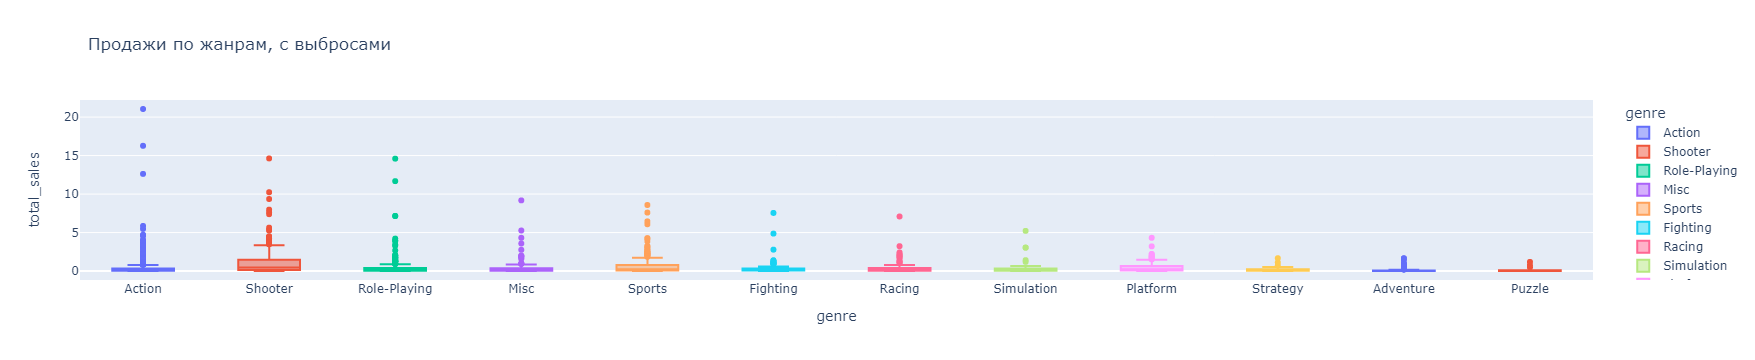

In [92]:
#ящик с усами по продажам по жанрам
px.box(good_df,
       x='genre',
       y='total_sales',
       color='genre',
       title='Продажи по жанрам, с выбросами')

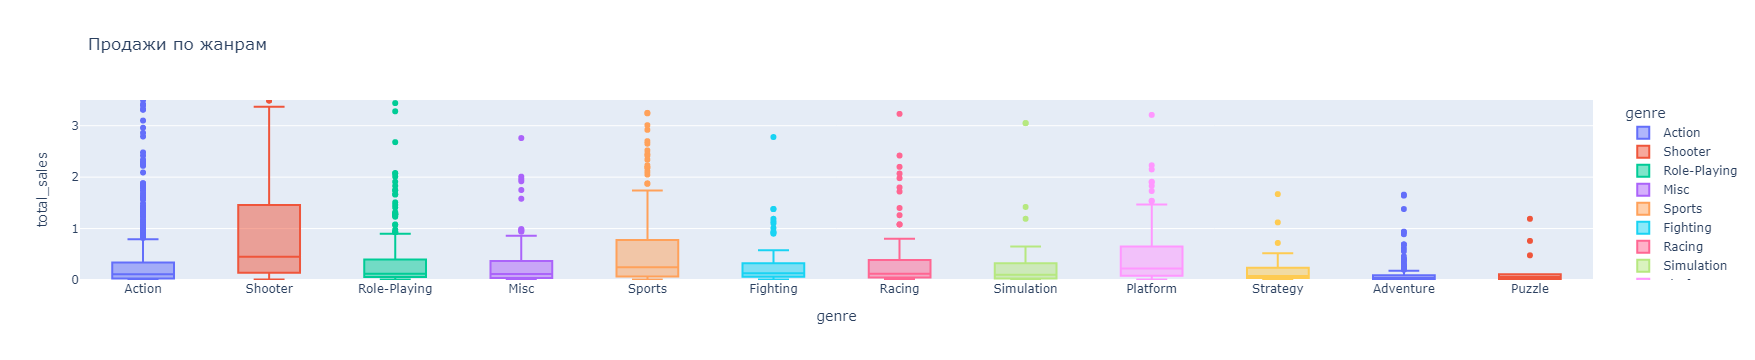

In [93]:
#ящик с усами по продажам по жанрам
fig = px.box(good_df,
       x='genre',
       y='total_sales',
       color='genre',
       title='Продажи по жанрам')
#изменение масштаба
fig.update_layout(yaxis=dict(range=[0,3.5]))

Медианные продажи у Шутеров гораздо выше чем у остальных жанров. На втором месте идут спортивные игры. У жанра Экш невысокие медианные продажи, но много выбросов достигающих 21 млн. Также интересно, что жанр платформер идет практически вровень со спортивными играми.

**Вывод**

Основными прибыльными жанрами можно выделить - Экшн, Шутер, Спорт и РПГ.

Однако, несмотря на высокую общую выручку игр в жанре экш, в этой нише высокая конкуренция. И все зависит от того, "выстрелит" ли игра. Это заметно по выбросам на ящике с усами.
Жанр Шутер практически не отстает по прибыли от экш-игр, но конкуренция там гораздо ниже, а прибыль стабилней и более предсказуемей. Спортивные и ролевые игры показывают среднюю выручку в сравнении с лидерами, но как и с шутерами, конкуренция ниже.

### Выводы <a id='22'></a>

- В развитии индустрии игр было два переломных момента (1994,2000), когда количество игр начало стремительно расти. Пиковое значение было достигнуто в 2008 году, после чего количество выпускаемых игр начало падать.
- Топ успешных платформ - PS2, X360, PS3, Wii, PS и DS.
- Медианный срок жизни платформы составляет 7 лет. Но основные лидеры продаж существуют 10+ лет. В среднем, в год появляется 1 новая платформа.
- Падение выручки у всех платформ к 2016 году и уменьшение количества выпускаемых игр (а с ними и жанров) обусловлено высокой конкуренцией. После выхода PS4 и XOne, такие платформы как PS3 и X360 стали менее актуальными и устаревшими, соответственно поддержка этих платформ и выпуск игр ушел на второй план. И так как, **Microsoft (XOne)** и **Sony (PS4)** прямые конкуренты, спад выручки связан с их битвой за аудиторию, подписочные сервисы и низкие цены. Поэтому количество игр продолжало расти, а цены падать.
- Оценки критиков напрямую влияют на количество продаж, они имеют влияние на огромную аудиторию. Плюс, в течении тех двух недель раннего доступа к игре, они подогревают интерес своей публики и привлекают внимание к продукту. За счёт этих факторов, на релизе игры она может "выстрелить" и принести компании большую прибыль в первые дни продаж.
- Оценки пользователей наоборот очень слабо влияют на условные дополнительные продажи игры, когда с течением времени потенциальный покупатель выбирает игру, ориентируясь на отзывы игроков.
- Основными прибыльными жанрами можно выделить - Экшн, Шутер, Спорт и РПГ. Однако, несмотря на огромную выручку игр в жанре экш, в этой нише высокая конкуренция. Жанр Шутер практически не отстает по прибыли от экш-игр, но конкуренция там гораздо ниже. Спортивные и ролевые игры показывают среднюю выручку в сравнении с лидерами, но, как и с шутерами, конкуренция ниже.



## Портрет пользователя по регионам <a id='23'></a>

На данном этапе необходимо определить для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Популярные платформы <a id='24'></a>

In [94]:
#сводная таблица по платформам и продажам в регионах
platform_top5 = good_df.pivot_table(index='platform',
                               values=['na_sales','eu_sales','jp_sales','other_sales', 'total_sales'],
                               aggfunc='sum').reset_index()

In [95]:
#первые 5 строк
platform_top5.head()

platform  eu_sales  jp_sales  na_sales  other_sales  total_sales
0      3DS     30.96     67.81     38.20         6.28       143.25
1       PC     25.36      0.00     11.11         2.96        39.43
2      PS3     67.81     23.35     63.50        26.77       181.43
3      PS4    141.09     15.96    108.74        48.35       314.14
4      PSV      6.10     18.59      5.04         3.26        32.99

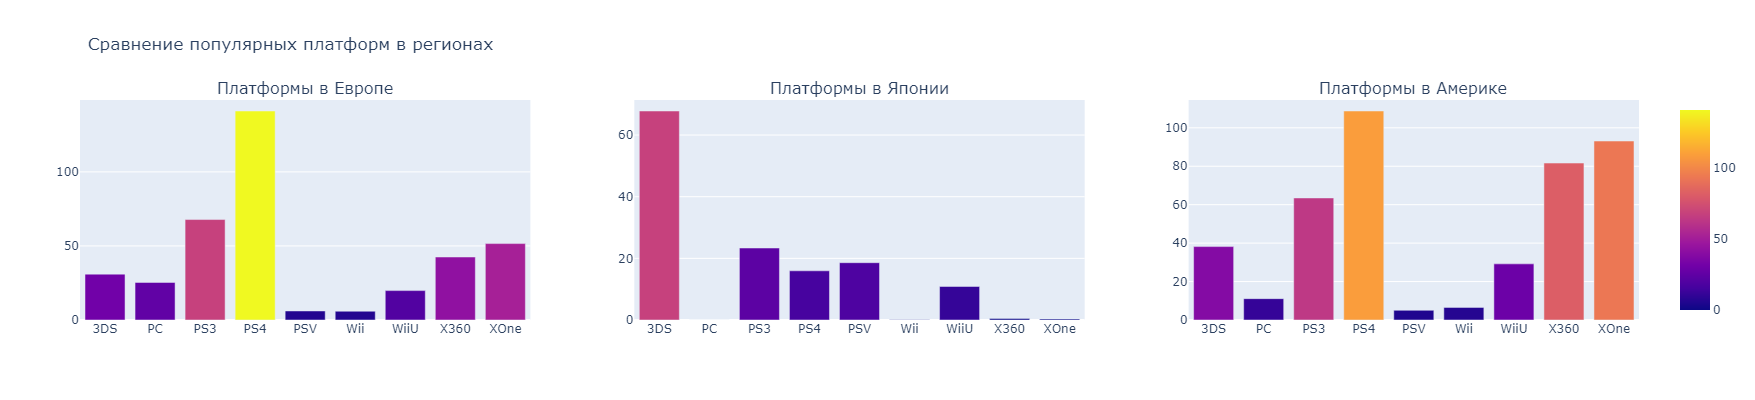

In [96]:
#создание фигуры 
fig = make_subplots(rows=1, cols=3,                                                               #сколько строк и колонок
                    subplot_titles=("Платформы в Европе", "Платформы в Японии", "Платформы в Америке")) #название графиков

#популярные платформы в Европе
fig.add_trace(go.Bar(x=platform_top5['platform'], y=platform_top5['eu_sales'],
                     marker=dict(color=platform_top5['eu_sales'], coloraxis="coloraxis") #цвет 
                    ), row=1, col=1)                                                   #колонка и строка

#популярные платформы в Японии
fig.add_trace(go.Bar(x=platform_top5['platform'], y=platform_top5['jp_sales'],
                     marker=dict(color=platform_top5['jp_sales'], coloraxis="coloraxis")
                    ), row=1, col=2)

#популярные платформы в Америке
fig.add_trace(go.Bar(x=platform_top5['platform'], y=platform_top5['na_sales'],
                     marker=dict(color=platform_top5['na_sales'], coloraxis="coloraxis")
                    ),row=1, col=3)

#изменение размера фигуры и скрытие легенды
fig.update_layout(height=400, width=900, showlegend=False, title_text='Сравнение популярных платформ в регионах')

**Вывод**
- Популярные платформы в Европе: PS4, PS3, XOne,X360, 3DS. Самая популярная PS4.
- Популярные платформы в Японии: 3DS, PS3, PSV, PS4, WiiU. На первом месте 3DS.
- Популярные платформы Америки: PS4, XOne, X360, PS3, 3DS. На первом месте PS4.

### Популярные жанры <a id='25'></a>

In [97]:
#сводная таблица по жанрам и продажам в регионах
genre_top5 = good_df.pivot_table(index='genre',
                               values=['na_sales','eu_sales','jp_sales','other_sales', 'total_sales'],
                               aggfunc='sum').reset_index()

In [98]:
#первые 5 строк
genre_top5.head()

genre  eu_sales  jp_sales  na_sales  other_sales  total_sales
0     Action    117.87     39.65    125.83        37.16       320.51
1  Adventure      8.22      5.11      7.14         2.43        22.90
2   Fighting      8.55      7.63     15.55         3.56        35.29
3       Misc     20.00      9.03     27.46         6.08        62.57
4   Platform     15.15      4.79     17.93         4.07        41.94

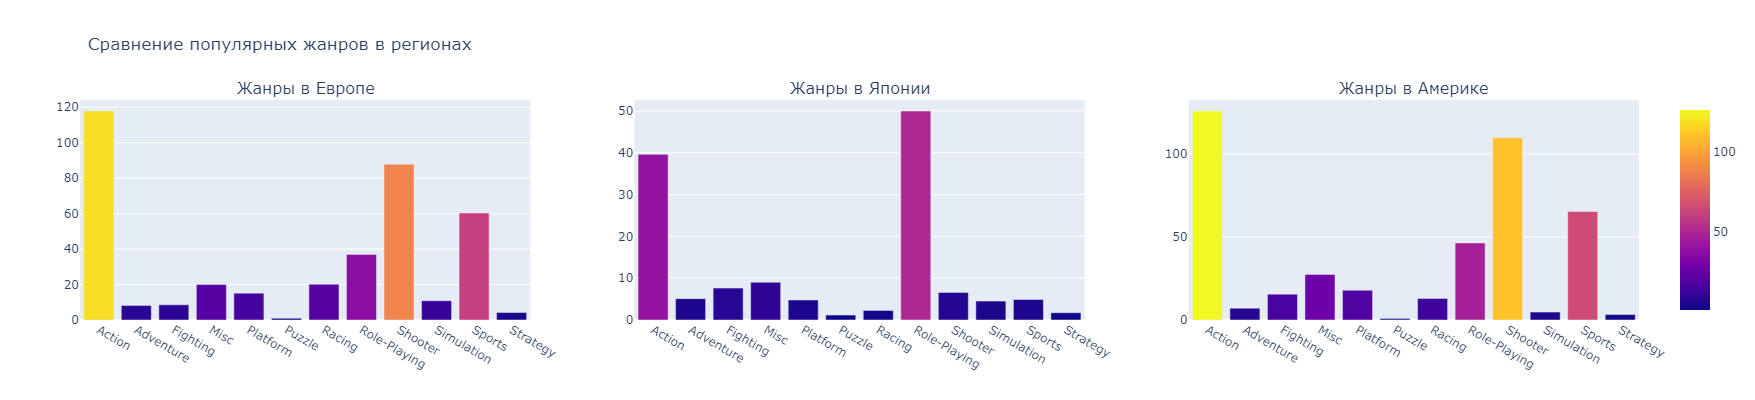

In [99]:
#создание фигуры 
fig = make_subplots(rows=1, cols=3,                                                               #сколько строк и колонок
                    subplot_titles=("Жанры в Европе", "Жанры в Японии", "Жанры в Америке")) #название графиков

#популярные жанры в Европе
fig.add_trace(go.Bar(y=genre_top5['eu_sales'], x=genre_top5['genre'],
                     marker=dict(color=genre_top5['eu_sales'], coloraxis="coloraxis") #цвет 
                    ), row=1, col=1)                                                   #колонка и строка

#популярные жанры в Японии
fig.add_trace(go.Bar(y=genre_top5['jp_sales'], x=genre_top5['genre'],
                     marker=dict(color=genre_top5['jp_sales'], coloraxis="coloraxis")
                    ), row=1, col=2)

#популярные жанры в Америке
fig.add_trace(go.Bar(y=genre_top5['na_sales'], x=genre_top5['genre'],
                     marker=dict(color=genre_top5['na_sales'], coloraxis="coloraxis")
                    ),row=1, col=3)

#изменение размера фигуры и скрытие легенды
fig.update_layout(height=400, width=1000, showlegend=False, title_text='Сравнение популярных жанров в регионах')

**Вывод**

- Популярные жанры в Европе: Action, Shooter, Sports, Role-Playing, Racing и Misc делят 5 место. Самый популярный жанр - Action.
- Популярные жанры в Японии: Role-Playing, Action, Misc, Fightings, Sports. Лидирующие позиции занимают Role-Playing и Action, у остальных жанров различия практически незаметны.
- Популярные жанры в Америке: Action, Shooter, Sports, Role-Playing, Misc. Самые популярные жанры - Action и Shooter.

В общей картине можно выделить 5 популярны жанров по всем регионам - Action, Shooter, Sports, Role-Playing, Misc. Распределение по топ позициям слегка меняется от региона. Только в Японии не так сильно любят шутеры, как файтинги.

### Влияние рейтинга на продажи <a id='26'></a>

In [100]:
#влияние рейтинга на продажи
rating_esrb = good_df.pivot_table(index='rating',
                               values=['na_sales','eu_sales','jp_sales','other_sales', 'total_sales'],
                               aggfunc='sum').reset_index()

In [101]:
rating_esrb

rating  eu_sales  jp_sales  na_sales  other_sales  total_sales
0      E     82.80     15.00     78.94        22.53       199.27
1   E10+     42.53      5.89     54.02        12.54       114.98
2      M    145.32     14.11    165.21        47.04       371.68
3      T     41.95     20.44     49.79        14.29       126.47
4    TBD     78.61     82.05     89.18        23.41       273.25

Описание рейтинга:
- **«E»** («Everyone») — «Для всех»
- **«E10+»** («Everyone 10 and older») — «Для всех от 10 лет и старше»
- **«T»** («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. 
- **«M»** («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
- **«RP»** («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу

TBD - этой аббревеатурой были заменены пропущенные значения

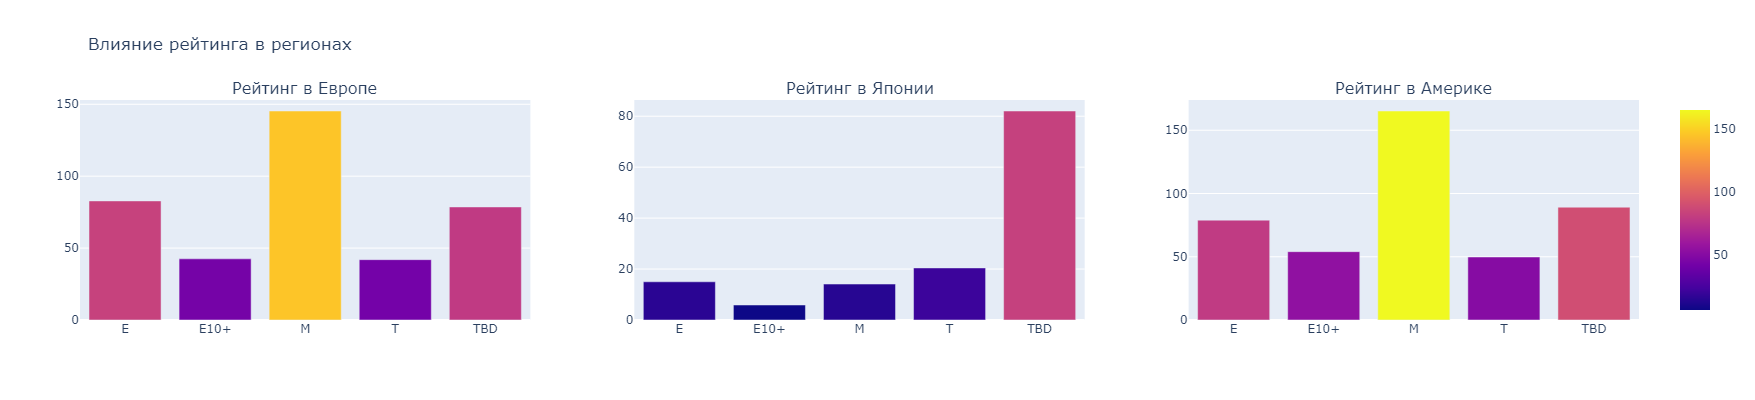

In [102]:
#создание фигуры 
fig = make_subplots(rows=1, cols=3,                                                               #сколько строк и колонок
                    subplot_titles=("Рейтинг в Европе", "Рейтинг в Японии", "Рейтинг в Америке")) #название графиков

#влияние рейтинга на продажи в Европе
fig.add_trace(go.Bar(x=rating_esrb['rating'], y=rating_esrb['eu_sales'],
                     marker=dict(color=rating_esrb['eu_sales'], coloraxis="coloraxis") #цвет 
                    ), row=1, col=1)                                                   #колонка и строка

#влияние рейтинга на продажи в Японии
fig.add_trace(go.Bar(x=rating_esrb['rating'], y=rating_esrb['jp_sales'],
                     marker=dict(color=rating_esrb['jp_sales'], coloraxis="coloraxis")
                    ), row=1, col=2)

#влияние рейтинга на продажи в Америке
fig.add_trace(go.Bar(x=rating_esrb['rating'], y=rating_esrb['na_sales'],
                     marker=dict(color=rating_esrb['na_sales'], coloraxis="coloraxis")
                    ),row=1, col=3)

#изменение размера фигуры и скрытие легенды
fig.update_layout(height=400, width=1000, showlegend=False,title_text='Влияние рейтинга в регионах')

**Вывод**

В Европе и Америке лидеры продаж - игры с рейтингом **M** (Для взрослых, 17+).
Из-за отсутсвующего рейтинга, невозможно наверняка определить лидирующую группу в Японии. Так как изначально рейтинг ESRB создавался для Америки и Канады.
Можно утверждать, что возрастной рейтинг игры влияет на продажи.

### Выводы <a id='27'></a>

**Топ-5 платформ**
- Популярные платформы в Европе: PS4, PS3, XOne,X360, 3DS. Самая популярная PS4.
- Популярные платформы в Японии: 3DS, PS3, PSV, PS4, WiiU. На первом месте 3DS.
- Популярные платформы Америки: PS4, XOne, X360, PS3, 3DS. На первом месте PS4.

**Топ-5 жанров**
- Популярные жанры в Европе: Action, Shooter, Sports, Role-Playing, Racing и Misc делят 5 место. Самый популярный жанр - Action.
- Популярные жанры в Японии: Role-Playing, Action, Misc, Fightings, Sports. Лидирующие позиции занимают Role-Playing и Action, у остальных жанров различия практически незаметны.
- Популярные жанры в Америке: Action, Shooter, Sports, Role-Playing, Misc. Самые популярные жанры - Action и Shooter.

В общей картине можно выделить 5 популярны жанров по всем регионам - Action, Shooter, Sports, Role-Playing, Misc. Распределение по топ позициям слегка меняется от региона. Только в Японии не так сильно любят шутеры, как файтинги.

**Влияние рейтинга**

В Европе и Америке лидеры продаж - игры с рейтингом **M** (Для взрослых, 17+).
Из-за отсутсвующего рейтинга, невозможно наверняка определить лидирующую группу в Японии. Так как изначально рейтинг ESRB создавался для Америки и Канады.

Возрастной рейтинг игры влияет на продажи в Европе и Америке.



**Из полученных данных можно составить портрет типичного игрока в каждом регионе:**

- Европа - платформа: PS4 или PS3, жанры - экшн, шутер, спорт, с возрастным рейтиногом 17+.
- Япония - платформа: 3DS или PS3, жанры - экшн, рпг, аркады. Корректно определить популярный возрастной рейтинг не удалось.
- Америка - платформа: PS4 или XOne, жанры - экшн, шутер, спорт, с возрастным рейтингом 17+.

## Проверка гипотез <a id='28'></a>

### Первая гипотеза <a id='29'></a>


**Проверка гипотезы**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

```
H_0: Средние пользовательские рейтинги (user_score) платформ Xbox One и PC равны;
H_a: Средние пользовательские рейтинги (user_score) платформ Xbox One и PC разные;
alpha = 0.05
```

Уберу из данных информацию с отсутствующими оценками.

In [103]:
#убираю из данных все нулевые оценки 
stats = good_df.loc[good_df['user_score'] != 0]

Так как Xbox One вышла в 2013 году, оставлю записи только с этого года.

In [104]:
stats2 = stats.loc[stats['year_of_release'] >= 2013]

Создам две переменные, с одельной информацией по каждой платформе.

In [105]:
xbox = stats2.loc[stats['platform'] == 'XOne']['user_score'] #только оценки Xbox
pc = stats2.loc[stats['platform'] == 'PC']['user_score'] #только оценки PC

**Платформа Xbox One**

In [106]:
#описание оценок платормы Xbox One
xbox.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [107]:
#дисперсия
np.var(xbox)

1.8965188383045533

**Платформа PC**

In [108]:
#описание оценок платормы PC
pc.describe()

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

In [109]:
#дисперсия
np.var(pc)

3.0163063475546332

Для проверки гипотезы: будет взят метод проверки равенства среднего двух генеральных совокупностей по взятым из них выборкам - **st.ttest_ind**

In [110]:
#вызов метода для проверки гипотезы
results = st.ttest_ind(xbox,pc,
                       equal_var=False) #дисперсии оказались разными, использую False

#значение уровня значимости 
alpha = 0.05

# вывод значения p-value на экран  
print(results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


**P-value больше 0.05. Не получилось отвергнуть нулевую гипотезу. Нет оснований полагать, что средние пользовательские рейтинги платформ Xbox One и PC разные.**

### Вторая гипотеза <a id='30'></a>

**Проверка гипотезы**: Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

```
H_0: Средние пользовательские рейтинги жанров Action и Sports одинаковые;
H_a: Средние пользовательские рейтинги жанров Action и Sports разные;
alpha = 0.05
```

In [111]:
action = stats.loc[stats['genre'] == 'Action']['user_score'] #только оценки жанра Экшн
sports = stats.loc[stats['genre'] == 'Sports']['user_score'] #только оценки жанра Спорт

**Жанр Action**

In [112]:
#описание оценок жанра Action
action.describe()

count    388.000000
mean       6.842784
std        1.327847
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [113]:
#дисперсия
np.var(action)

1.7586334892124535

**Жанр Sports**

In [114]:
#описание оценок жанра Sports
sports.describe()

count    159.000000
mean       5.249686
std        1.783038
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

In [115]:
#дисперсия
np.var(sports)

3.159229460859934

Для проверки гипотезы: будет взят метод проверки равенства среднего двух генеральных совокупностей по взятым из них выборкам - **st.ttest_ind**

In [116]:
#вызов метода для проверки гипотезы
results = st.ttest_ind(action,sports,
                       equal_var=False) #дисперсии оказались разными, использую False

#значение уровня значимости 
alpha = 0.05

# вывод значения p-value на экран  
print(results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

2.4191414517472698e-20
Отвергаем нулевую гипотезу


**Вывод**

P-value меньше 0.05. Отвергаем нулевую гипотезу, результаты значимы на 5% уровне. Нет оснований полагать, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

### Вывод

- Гипотеза 1: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые".

P-value больше 0.05. Не получилось отвергнуть нулевую гипотезу. Нет оснований полагать, что средние пользовательские рейтинги платформ Xbox One и PC разные.

- Гипотеза 2: "Средние пользовательские рейтинги жанров Action и Sports разные".

P-value меньше 0.05. Отвергаем нулевую гипотезу, результаты значимы на 5% уровне. Нет оснований полагать, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

## Общие выводы <a id='31'></a>

**Шаг 1. Изучение общей информации**

Ознакомилась с данными, обнаружила проблем в названии столбцов и несколько типов данных, требующих изменений.
- Необходимо привести названия столбцов к общему стилю (нижнему регистру)
- Исправить формат в годе выпуска на int, так как указан только год.
- Исправить формат в оценке пользователей на тип float
- Исправить формат в оценке от критиков на тип int

**Шаг 2. Предобработка данных**

- Названия колонок были приведены к нижнему регистру.
- Исправлены типы данных в колонках: год релиза, оценки от критиков, оценки от пользователей.
- В колонках с оценками критиков и пользователей были обнаружены пропуски в размере 40% от выборки. Пропущенные значения были заменены на **0** как отсутствие значений. Так же было обнаружено необычное значение в оценках пользователей **TBD** (To Be Determined) — это отсутствие оценок. Данное значение было заменено нулем, чтобы не терять данные при исследовании и построении графиков.
- Удалены пропущенные значения в колонках с именем, годом выхода и жанром. Явные и неявные дубликаты не были обнаружены. Повторы, встречающиеся в названиях игр, являются релизом игры на разных платформах.
- Был добавлен новый столбец с итоговой суммой продаж по всем регионам.

Причины возникновения пропусков:

- Система ESRB используется в США, Мексике и Канаде. Издатель игр либо не планировал распространение своего продукта в этих странах, либо информация была собрана некорректно, и информация о рейтинге не попала в выгрузку.
- Большая доля пропусков в колонках с оценками от пользователей и критиков говорит либо об их отсутствии (характерно для старых игр до 2000 года), либо о некорректном сборе и выгрузке информации.

**Шаг 3. Исследовательский анализ данных**

- В развитии индустрии игр было два переломных момента (1994,2000), когда количество игр начало стремительно расти. Пиковое значение было достигнуто в 2008 году, после чего количество выпускаемых игр начало падать.
- Топ успешных платформ - PS2, X360, PS3, Wii, PS и DS.
- Медианный срок жизни платформы составляет 7 лет. Но основные лидеры продаж существуют 10+ лет. В среднем, в год появляется 1 новая платформа.
- Падение выручки у всех платформ к 2016 году и уменьшение количества выпускаемых игр (а с ними и жанров) обусловлено высокой конкуренцией. После выхода PS4 и XOne, такие платформы как PS3 и X360 стали менее актуальными и устаревшими, соответственно поддержка этих платформ и выпуск игр ушел на второй план. И так как, **Microsoft (XOne)** и **Sony (PS4)** прямые конкуренты, спад выручки связан с их битвой за аудиторию, подписочные сервисы и низкие цены. Поэтому количество игр продолжало расти, а цены падать.
- Оценки критиков напрямую влияют на количество продаж, они имеют влияние на огромную аудиторию. Плюс, в течении тех двух недель раннего доступа к игре, они подогревают интерес своей публики и привлекают внимание к продукту. За счёт этих факторов, на релизе игры она может "выстрелить" и принести компании большую прибыль в первые дни продаж.
- Оценки пользователей наоборот очень слабо влияют на условные дополнительные продажи игры, когда с течением времени потенциальный покупатель выбирает игру, ориентируясь на отзывы игроков.
- Основными прибыльными жанрами можно выделить - Экшн, Шутер, Спорт и РПГ.
Однако, несмотря на высокую общую выручку игр в жанре экш, в этой нише высокая конкуренция. И все зависит от того, "выстрелит" ли игра. Это заметно по выбросам на ящике с усами.
Жанр Шутер практически не отстает по прибыли от экш-игр, но конкуренция там гораздо ниже, а прибыль стабилней и более предсказуемей. Спортивные и ролевые игры показывают среднюю выручку в сравнении с лидерами, но как и с шутерами, конкуренция ниже.

**Топ-5 платформ**
- Популярные платформы в Европе: PS4, PS3, XOne,X360, 3DS.
- Популярные платформы в Японии: 3DS, PS3, PSV, PS4, WiiU. 
- Популярные платформы Америки: PS4, XOne, X360, PS3, 3DS. 

**Топ-5 жанров**
- Популярные жанры в Европе: Action, Shooter, Sports, Role-Playing, Racing и Misc делят 5 место. С
- Популярные жанры в Японии: Role-Playing, Action, Misc, Fightings, Sports. 
- Популярные жанры в Америке: Action, Shooter, Sports, Role-Playing, Misc.

В общей картине можно выделить 5 популярны жанров по всем регионам - Action, Shooter, Sports, Role-Playing, Misc. Распределение по топ позициям слегка меняется от региона. Только в Японии не так сильно любят шутеры, как файтинги.

**Влияние рейтинга**

В Европе и Америке лидеры продаж - игры с рейтингом **M** (Для взрослых, 17+).
Из-за отсутсвующего рейтинга, невозможно наверняка определить лидирующую группу в Японии. Так как изначально рейтинг ESRB создавался для Америки и Канады.

Возрастной рейтинг игры влияет на продажи в Европе и Америке.

**Из полученных данных можно составить портрет типичного игрока в каждом регионе:**

- Европа - платформа: PS4 или PS3, жанры - экшн, шутер, спорт, с возрастным рейтиногом 17+.
- Япония - платформа: 3DS или PS3, жанры - экшн, рпг, аркады. Корректно определить популярный возрастной рейтинг не удалось.
- Америка - платформа: PS4 или XOne, жанры - экшн, шутер, спорт, с возрастным рейтингом 17+.

**Шаг 4. Проверка гипотез**

- Гипотеза 1: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые".

P-value больше 0.05. Не получилось отвергнуть нулевую гипотезу. Нет оснований полагать, что средние пользовательские рейтинги платформ Xbox One и PC разные.

- Гипотеза 2: "Средние пользовательские рейтинги жанров Action и Sports разные".

P-value меньше 0.05. Отвергаем нулевую гипотезу, результаты значимы на 5% уровне. Нет оснований полагать, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Из всех данных можно заключить:**
- Лучше всего выбирать платформы для выпуска игр из - PS4, PS3, 3DS и Xone.
- Из жанров выбирать - Shooter, RPG, Sports и Misc. Хоть жанр Action очень популярен, конкуренция слишком высокая.
- Ориентироваться на рейтинг для взрослой аудитории (17+).